In [1]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

In [4]:
# Load the processed form data with average scores
form_csv_path = "/Users/matthewsimon/Projects/solopro/test/AAA/Daylio_Daily_Log_Form_Ready_with_Average.csv"
form_df = pd.read_csv(form_csv_path)

# Load the original data with activities for correlation analysis
original_csv_path = "/Users/matthewsimon/Projects/solopro/test/AAA/Daylio_Abid_with_summaries.csv"
original_df = pd.read_csv(original_csv_path)

print("📊 LOADED DATASETS:")
print(f"Form data shape: {form_df.shape}")
print(f"Original data shape: {original_df.shape}")

# Quick peek at both datasets
print(f"\n📋 Form data columns: {list(form_df.columns)}")
print(f"📋 Original data columns: {list(original_df.columns)}")

# Show sample of form data
form_df.head()

📊 LOADED DATASETS:
Form data shape: (372, 13)
Original data shape: (372, 9)

📋 Form data columns: ['date', 'weekday', 'original_mood', 'form_overallMood', 'form_workSatisfaction', 'form_personalLifeSatisfaction', 'form_balanceRating', 'form_sleep', 'form_exercise', 'form_highlights', 'form_challenges', 'form_tomorrowGoal', 'average_score']
📋 Original data columns: ['full_date', 'date', 'weekday', 'time', 'sub_mood', 'activities', 'mood', 'full_date_dt', 'summary']


,date,weekday,original_mood,form_overallMood,form_workSatisfaction,form_personalLifeSatisfaction,form_balanceRating,form_sleep,form_exercise,form_highlights,form_challenges,form_tomorrowGoal,average_score
0,16/04/2021,Friday,Good,8,10,10,10,7.5,True,Great day! Good Friday. I focused on spiritual...,Overall positive day with minor challenges.,"Continue with Reading, Art and maintain positi...",9.50
1,15/04/2021,Thursday,Good,8,10,10,10,7.5,True,Great day! Good Thursday. I focused on spiritu...,Overall positive day with minor challenges.,"Continue with Reading, Learning and maintain p...",9.50
2,14/04/2021,Wednesday,Normal,5,10,10,8,7.0,True,"Found positives: Reading, Learning, Prayer","Feeling confused, which made the day more chal...","Continue with Reading, Learning and maintain p...",8.25
3,13/04/2021,Tuesday,Normal,5,10,10,8,7.5,True,"Found positives: Reading, Learning, Art",Overall positive day with minor challenges.,"Continue with Reading, Learning and maintain p...",8.25
4,12/04/2021,Monday,Awful,1,8,3,6,7.5,True,"Found positives: Reading, Learning, Fasting","Feeling angry, which made the day more challen...","Continue with Reading, Learning and maintain p...",4.50


In [10]:
# Let's examine the date range in our dataset
print("Dataset info:")
print(f"Total rows: {len(df)}")
print(f"Date range: {df['full_date'].min()} to {df['full_date'].max()}")
print(f"Unique dates: {df['full_date'].nunique()}")

# Convert full_date to datetime for easier filtering
df['full_date_dt'] = pd.to_datetime(df['full_date'], format='%d/%m/%Y')

print(f"\nDateTime range: {df['full_date_dt'].min()} to {df['full_date_dt'].max()}")

Dataset info:
Total rows: 940
Date range: 01/01/2019 to 31/12/2020
Unique dates: 775

DateTime range: 2018-02-03 00:00:00 to 2021-04-16 00:00:00


In [11]:
# Filter data from 16/04/2020 through 16/04/2021
start_date = pd.to_datetime('16/04/2020', format='%d/%m/%Y')
end_date = pd.to_datetime('16/04/2021', format='%d/%m/%Y')

# Create the filtered dataframe
df_filtered = df[(df['full_date_dt'] >= start_date) & (df['full_date_dt'] <= end_date)]

print(f"Filtered dataset info:")
print(f"Original rows: {len(df)}")
print(f"Filtered rows: {len(df_filtered)}")
print(f"Filtered date range: {df_filtered['full_date'].min()} to {df_filtered['full_date'].max()}")
print(f"Filtered datetime range: {df_filtered['full_date_dt'].min()} to {df_filtered['full_date_dt'].max()}")

# Display first few rows of filtered data
print(f"\nFirst 5 rows of filtered data:")
df_filtered.head()

Filtered dataset info:
Original rows: 940
Filtered rows: 372
Filtered date range: 01/01/2021 to 31/12/2020
Filtered datetime range: 2020-04-16 00:00:00 to 2021-04-16 00:00:00

First 5 rows of filtered data:


,full_date,date,weekday,time,sub_mood,activities,mood,full_date_dt
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good,2021-04-16
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good,2021-04-15
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal,2021-04-14
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal,2021-04-13
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful,2021-04-12


In [13]:
# Replace the original dataframe with the filtered one
df = df_filtered.copy()

# Optional: Remove the temporary datetime column if you don't need it
# df = df.drop('full_date_dt', axis=1)

print(f"✅ Dataset successfully filtered!")
print(f"Working with {len(df)} rows from {df['full_date'].min()} to {df['full_date'].max()}")
print(f"Date range: {df['full_date_dt'].min().strftime('%d/%m/%Y')} to {df['full_date_dt'].max().strftime('%d/%m/%Y')}")
print(f"\nYour filtered dataset is now ready for analysis!")

✅ Dataset successfully filtered!
Working with 372 rows from 01/01/2021 to 31/12/2020
Date range: 16/04/2020 to 16/04/2021

Your filtered dataset is now ready for analysis!


In [14]:
# Let's first examine the unique values in our key columns to understand the data better
print("Unique moods:")
print(df['mood'].unique())
print(f"\nMood distribution:")
print(df['mood'].value_counts())

print(f"\nUnique sub_moods (first 20):")
print(df['sub_mood'].unique()[:20])

print(f"\nSample activities (first 5 rows):")
for i in range(5):
    print(f"Row {i}: {df.iloc[i]['activities']}")

Unique moods:
['Good' 'Normal' 'Awful' 'Amazing' 'Bad']

Mood distribution:
mood
Good       183
Normal      84
Amazing     60
Bad         23
Awful       22
Name: count, dtype: int64

Unique sub_moods (first 20):
['yolo' 'focused ' 'confused ' 'wondering' 'angry' 'blessed ' 'excited '
 'Chill' 'hungry ' 'happiest day' 'weak' 'meh' 'awful' 'Cool' 'worried '
 'over the moon ' 'triggered ' 'sad af' 'scared ' 'good']

Sample activities (first 5 rows):
Row 0: reading | Art | prayer | fasting  | walk | meditation  | shower | writing | Watching series  | good meal | reddit | language learning  | streaming  | youtube | cooking | travel | cleaning | new things  | power nap | Documentary  | penpal | coding 
Row 1: reading | learning  | Art | prayer | fasting  | walk | meditation  | shower | Audio books  | writing | Watching series  | good meal | reddit | language learning  | shave  | streaming  | youtube | cooking | cleaning | research  | new things  | power nap | repair | Documentary  | penpal |

In [15]:
def create_daily_summary(row):
    """
    Create a tweet-style daily summary (~250 chars) based on mood, sub_mood, activities, and time
    """
    date = row['date']
    weekday = row['weekday'] 
    time = row['time']
    mood = row['mood']
    sub_mood = row['sub_mood'].strip()
    activities = row['activities']
    
    # Parse activities (they're separated by |)
    activity_list = [act.strip() for act in activities.split('|') if act.strip()]
    
    # Group similar activities for more natural summaries
    spiritual = [act for act in activity_list if any(word in act.lower() for word in ['prayer', 'fasting', 'quran', 'meditation'])]
    learning = [act for act in activity_list if any(word in act.lower() for word in ['reading', 'learning', 'coding', 'language', 'tutorial', 'documentary'])]
    creative = [act for act in activity_list if any(word in act.lower() for word in ['art', 'writing', 'designing', 'cooking'])]
    wellness = [act for act in activity_list if any(word in act.lower() for word in ['walk', 'shower', 'sleep', 'power nap', 'good meal'])]
    entertainment = [act for act in activity_list if any(word in act.lower() for word in ['watching', 'series', 'youtube', 'streaming', 'reddit', 'podcast'])]
    
    # Start building the summary
    summary_parts = []
    
    # Add a mood-based opening
    mood_intros = {
        'Amazing': f"Amazing {weekday}!",
        'Good': f"Good {weekday}.",
        'Normal': f"Regular {weekday}.",
        'Bad': f"Tough {weekday}.",
        'Awful': f"Challenging {weekday}."
    }
    
    summary_parts.append(mood_intros.get(mood, f"{weekday}."))
    
    # Add activities in a natural flow
    activity_descriptions = []
    
    if spiritual:
        if len(spiritual) > 2:
            activity_descriptions.append("focused on spiritual practices")
        elif 'prayer' in str(spiritual).lower():
            activity_descriptions.append("spent time in prayer and reflection")
        else:
            activity_descriptions.append("engaged in mindful practices")
    
    if learning:
        if len(learning) > 2:
            activity_descriptions.append("dove deep into learning")
        elif 'reading' in str(learning).lower():
            activity_descriptions.append("immersed in reading and study")
        else:
            activity_descriptions.append("focused on personal growth")
    
    if creative:
        if len(creative) > 1:
            activity_descriptions.append("explored creative pursuits")
        else:
            activity_descriptions.append(f"engaged in {creative[0].lower()}")
    
    if wellness:
        activity_descriptions.append("prioritized self-care")
    
    if entertainment:
        activity_descriptions.append("enjoyed some entertainment")
    
    # Combine activity descriptions
    if activity_descriptions:
        if len(activity_descriptions) == 1:
            summary_parts.append(f"I {activity_descriptions[0]}.")
        elif len(activity_descriptions) == 2:
            summary_parts.append(f"I {activity_descriptions[0]} and {activity_descriptions[1]}.")
        else:
            summary_parts.append(f"I {', '.join(activity_descriptions[:-1])}, and {activity_descriptions[-1]}.")
    
    # Add sub_mood context if meaningful
    sub_mood_lower = sub_mood.lower()
    if sub_mood_lower not in ['', 'good', 'normal'] and sub_mood_lower != mood.lower():
        if sub_mood_lower in ['focused', 'blessed', 'excited', 'chill']:
            summary_parts.append(f"Feeling {sub_mood_lower}.")
        elif sub_mood_lower in ['confused', 'worried', 'triggered']:
            summary_parts.append(f"Though feeling {sub_mood_lower}.")
        elif sub_mood_lower == 'yolo':
            summary_parts.append("Living life to the fullest!")
        elif sub_mood_lower == 'happiest day':
            summary_parts.append("One of my happiest days!")
    
    # Add time context for late entries
    if 'am' in time.lower() and int(time.split(':')[0]) < 6:
        summary_parts.append("Late night reflections.")
    
    # Combine all parts
    full_summary = " ".join(summary_parts)
    
    # Trim to ~250 characters if needed
    if len(full_summary) > 250:
        full_summary = full_summary[:247] + "..."
    
    return full_summary

# Apply the function to create summaries
print("Creating daily summaries...")
df['summary'] = df.apply(create_daily_summary, axis=1)
print("✅ Summary column added!")

# Show a few examples
print(f"\nSample summaries:")
for i in range(3):
    print(f"\nRow {i+1} ({df.iloc[i]['full_date']}):")
    print(f"Mood: {df.iloc[i]['mood']} | Sub-mood: {df.iloc[i]['sub_mood']}")
    print(f"Summary: {df.iloc[i]['summary']}")
    print(f"Length: {len(df.iloc[i]['summary'])} characters")

Creating daily summaries...
✅ Summary column added!

Sample summaries:

Row 1 (16/04/2021):
Mood: Good | Sub-mood: yolo
Summary: Good Friday. I focused on spiritual practices, dove deep into learning, explored creative pursuits, prioritized self-care, and enjoyed some entertainment. Living life to the fullest!
Length: 182 characters

Row 2 (15/04/2021):
Mood: Good | Sub-mood: focused 
Summary: Good Thursday. I focused on spiritual practices, dove deep into learning, explored creative pursuits, prioritized self-care, and enjoyed some entertainment. Feeling focused. Late night reflections.
Length: 197 characters

Row 3 (14/04/2021):
Mood: Normal | Sub-mood: confused 
Summary: Regular Wednesday. I focused on spiritual practices, dove deep into learning, explored creative pursuits, prioritized self-care, and enjoyed some entertainment. Though feeling confused. Late night reflections.
Length: 209 characters


In [16]:
# Verify all rows have summaries
print(f"Total rows: {len(df)}")
print(f"Rows with summaries: {df['summary'].notna().sum()}")
print(f"Summary length stats:")
summary_lengths = df['summary'].str.len()
print(f"  Average: {summary_lengths.mean():.1f} characters")
print(f"  Min: {summary_lengths.min()} characters") 
print(f"  Max: {summary_lengths.max()} characters")

# Display the updated dataframe structure
print(f"\nDataframe columns: {list(df.columns)}")

# Show a few more diverse examples
print(f"\nMore summary examples:")
sample_indices = [10, 50, 100, 150, 200]
for idx in sample_indices:
    if idx < len(df):
        row = df.iloc[idx]
        print(f"\n{row['full_date']} ({row['weekday']}) - {row['mood']} mood:")
        print(f"'{row['summary']}'")

# Show the dataframe with the new summary column
print(f"\nFirst 3 rows with summary column:")
display_cols = ['full_date', 'weekday', 'mood', 'sub_mood', 'summary']
df[display_cols].head(3)

Total rows: 372
Rows with summaries: 372
Summary length stats:
  Average: 164.5 characters
  Min: 85 characters
  Max: 209 characters

Dataframe columns: ['full_date', 'date', 'weekday', 'time', 'sub_mood', 'activities', 'mood', 'full_date_dt', 'summary']

More summary examples:

06/04/2021 (Tuesday) - Good mood:
'Good Tuesday. I focused on spiritual practices, dove deep into learning, explored creative pursuits, prioritized self-care, and enjoyed some entertainment. Feeling focused.'

25/02/2021 (Thursday) - Good mood:
'Good Thursday. I focused on spiritual practices, dove deep into learning, explored creative pursuits, prioritized self-care, and enjoyed some entertainment. Feeling blessed. Late night reflections.'

06/01/2021 (Wednesday) - Good mood:
'Good Wednesday. I engaged in mindful practices, dove deep into learning, explored creative pursuits, prioritized self-care, and enjoyed some entertainment. Feeling blessed.'

18/11/2020 (Wednesday) - Good mood:
'Good Wednesday. I focuse

,full_date,weekday,mood,sub_mood,summary
0,16/04/2021,Friday,Good,yolo,"Good Friday. I focused on spiritual practices,..."
1,15/04/2021,Thursday,Good,focused,Good Thursday. I focused on spiritual practice...
2,14/04/2021,Wednesday,Normal,confused,Regular Wednesday. I focused on spiritual prac...


In [17]:
# Export the enhanced dataframe to CSV
output_path = "/Users/matthewsimon/Projects/solopro/test/Daylio_Abid_with_summaries.csv"

# Save to CSV
df.to_csv(output_path, index=False)

print(f"✅ CSV file exported successfully!")
print(f"📁 File location: {output_path}")
print(f"📊 Exported data:")
print(f"   - {len(df)} rows")
print(f"   - {len(df.columns)} columns: {list(df.columns)}")
print(f"   - Date range: {df['full_date_dt'].min().strftime('%d/%m/%Y')} to {df['full_date_dt'].max().strftime('%d/%m/%Y')}")

# Show file size
import os
file_size = os.path.getsize(output_path)
print(f"   - File size: {file_size:,} bytes ({file_size/1024:.1f} KB)")

print(f"\n📥 Your CSV file is ready for download!")
print(f"💡 The file includes your original data plus the new 'summary' column with tweet-style daily summaries.")

✅ CSV file exported successfully!
📁 File location: /Users/matthewsimon/Projects/solopro/test/Daylio_Abid_with_summaries.csv
📊 Exported data:
   - 372 rows
   - 9 columns: ['full_date', 'date', 'weekday', 'time', 'sub_mood', 'activities', 'mood', 'full_date_dt', 'summary']
   - Date range: 16/04/2020 to 16/04/2021
   - File size: 179,176 bytes (175.0 KB)

📥 Your CSV file is ready for download!
💡 The file includes your original data plus the new 'summary' column with tweet-style daily summaries.


In [18]:
# Preview the exported CSV file to verify it was saved correctly
print("📋 Preview of exported CSV file:")
print("="*50)

# Read back the CSV to verify
df_verify = pd.read_csv(output_path)
print(f"Verified: {len(df_verify)} rows and {len(df_verify.columns)} columns")

# Show the column headers
print(f"\nColumn headers:")
for i, col in enumerate(df_verify.columns, 1):
    print(f"  {i}. {col}")

# Show first 2 rows with key columns
print(f"\nFirst 2 rows (key columns):")
preview_cols = ['full_date', 'weekday', 'mood', 'summary']
print(df_verify[preview_cols].head(2).to_string(index=False))

print(f"\n✅ Export verification complete - your CSV file is ready!")
print(f"📂 You can find it at: {output_path}")

📋 Preview of exported CSV file:
Verified: 372 rows and 9 columns

Column headers:
  1. full_date
  2. date
  3. weekday
  4. time
  5. sub_mood
  6. activities
  7. mood
  8. full_date_dt
  9. summary

First 2 rows (key columns):
 full_date  weekday mood                                                                                                                                                                                               summary
16/04/2021   Friday Good                Good Friday. I focused on spiritual practices, dove deep into learning, explored creative pursuits, prioritized self-care, and enjoyed some entertainment. Living life to the fullest!
15/04/2021 Thursday Good Good Thursday. I focused on spiritual practices, dove deep into learning, explored creative pursuits, prioritized self-care, and enjoyed some entertainment. Feeling focused. Late night reflections.

✅ Export verification complete - your CSV file is ready!
📂 You can find it at: /Users/matthewsimon/P

In [19]:
# DAILY LOG FORM MAPPING ANALYSIS
# =====================================

print("🔍 DAILY LOG FORM vs CSV DATA MAPPING ANALYSIS")
print("=" * 60)

print("\n📊 YOUR CSV DATA COLUMNS:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

# Let's show a sample row and how it maps
sample_row = df.iloc[0]
print(f"\n📅 SAMPLE ROW: {sample_row['full_date']} ({sample_row['weekday']})")
print(f"Original mood: {sample_row['mood']}")
print(f"Sub-mood: {sample_row['sub_mood']}")
print(f"Summary: {sample_row['summary'][:100]}...")

print(f"\n🎯 DAILY LOG FORM FIELD MAPPING:")
print("=" * 40)

# 1. Mood Mapping
mood_mapping = {
    'Amazing': 10,
    'Good': 8, 
    'Normal': 5,
    'Bad': 3,
    'Awful': 1
}

print(f"1️⃣ OVERALL MOOD SLIDER (1-10):")
mapped_mood = mood_mapping.get(sample_row['mood'], 5)
print(f"   CSV 'mood': '{sample_row['mood']}' → Form value: {mapped_mood}/10")

# 2. Activities Analysis
activities = sample_row['activities'].split('|')
activities_clean = [act.strip().lower() for act in activities if act.strip()]

exercise_activities = ['walk', 'exercise', 'gym', 'run', 'bike', 'sport']
sleep_keywords = ['sleep', 'power nap', 'nap', 'rest']
work_activities = ['coding', 'learning', 'tutorial', 'research', 'writing', 'documentary']
personal_activities = ['art', 'cooking', 'meditation', 'prayer', 'reading', 'quran']

has_exercise = any(ex in ' '.join(activities_clean) for ex in exercise_activities)
work_count = sum(1 for work in work_activities if work in ' '.join(activities_clean))
personal_count = sum(1 for pers in personal_activities if pers in ' '.join(activities_clean))

print(f"\n2️⃣ EXERCISE CHECKBOX:")
print(f"   Has exercise activities: {has_exercise}")
exercise_found = [act for act in activities_clean if any(ex in act for ex in exercise_activities)]
print(f"   Exercise activities found: {exercise_found}")

print(f"\n3️⃣ WORK SATISFACTION SLIDER (1-10):")
# Base it on work activities + mood
work_satisfaction = min(10, max(1, (work_count * 1.5) + mood_mapping.get(sample_row['mood'], 5) - 2))
print(f"   Work activities count: {work_count}")
print(f"   Work activities: {[act for act in activities_clean if any(w in act for w in work_activities)]}")
print(f"   Calculated work satisfaction: {work_satisfaction:.0f}/10")

print(f"\n4️⃣ PERSONAL LIFE SATISFACTION SLIDER (1-10):")
personal_satisfaction = min(10, max(1, (personal_count * 1.2) + mood_mapping.get(sample_row['mood'], 5) - 1))
print(f"   Personal activities count: {personal_count}")
print(f"   Personal activities: {[act for act in activities_clean if any(p in act for p in personal_activities)]}")
print(f"   Calculated personal satisfaction: {personal_satisfaction:.0f}/10")

print(f"\n5️⃣ WORK-LIFE BALANCE SLIDER (1-10):")
# Good balance if both work and personal activities exist
if work_count > 0 and personal_count > 0:
    balance_score = min(10, 6 + mood_mapping.get(sample_row['mood'], 5) // 2)
elif work_count > 0 or personal_count > 0:
    balance_score = 4
else:
    balance_score = 2
print(f"   Has both work & personal: {work_count > 0 and personal_count > 0}")
print(f"   Calculated balance: {balance_score}/10")

print(f"\n6️⃣ SLEEP (hours):")
# Try to extract from time or estimate
if 'power nap' in ' '.join(activities_clean):
    estimated_sleep = 7.5  # Assume good sleep if taking naps
else:
    estimated_sleep = 7.0  # Default
print(f"   Estimated sleep hours: {estimated_sleep}")

print(f"\n7️⃣ TEXT FIELDS:")
print(f"   📝 HIGHLIGHTS (textarea):")
print(f"      Source: Use positive parts of summary + good mood activities")
if sample_row['mood'] in ['Amazing', 'Good']:
    highlight_text = f"Great day! {sample_row['summary'][:80]}..."
else:
    highlight_text = f"Found some positives: {', '.join(activities_clean[:3])}"
print(f"      Generated: \"{highlight_text}\"")

print(f"\n   📝 CHALLENGES (textarea):")
print(f"      Source: Use sub_mood + negative context from mood")
if sample_row['sub_mood'].strip().lower() in ['confused', 'angry', 'worried', 'triggered', 'sad', 'awful']:
    challenge_text = f"Feeling {sample_row['sub_mood'].strip()}, which made the day more difficult."
elif sample_row['mood'] in ['Bad', 'Awful']:
    challenge_text = f"Had a {sample_row['mood'].lower()} day overall, faced some difficulties."
else:
    challenge_text = "Overall positive day with minor challenges."
print(f"      Generated: \"{challenge_text}\"")

print(f"\n   📝 TOMORROW'S GOAL (textarea):")
print(f"      Source: Derive from patterns and missing activities")
tomorrow_goal = f"Continue with {', '.join(activities_clean[:2])} and maintain positive momentum."
print(f"      Generated: \"{tomorrow_goal}\"")

print(f"\n" + "=" * 60)
print(f"✨ COMPLETE FORM DATA for {sample_row['full_date']}:")
print(f"   overallMood: {mapped_mood}")
print(f"   workSatisfaction: {work_satisfaction:.0f}")
print(f"   personalLifeSatisfaction: {personal_satisfaction:.0f}")
print(f"   balanceRating: {balance_score}")
print(f"   sleep: {estimated_sleep}")
print(f"   exercise: {has_exercise}")
print(f"   highlights: \"{highlight_text}\"")
print(f"   challenges: \"{challenge_text}\"") 
print(f"   tomorrowGoal: \"{tomorrow_goal}\"")

🔍 DAILY LOG FORM vs CSV DATA MAPPING ANALYSIS

📊 YOUR CSV DATA COLUMNS:
   1. full_date
   2. date
   3. weekday
   4. time
   5. sub_mood
   6. activities
   7. mood
   8. full_date_dt
   9. summary

📅 SAMPLE ROW: 16/04/2021 (Friday)
Original mood: Good
Sub-mood: yolo
Summary: Good Friday. I focused on spiritual practices, dove deep into learning, explored creative pursuits, ...

🎯 DAILY LOG FORM FIELD MAPPING:
1️⃣ OVERALL MOOD SLIDER (1-10):
   CSV 'mood': 'Good' → Form value: 8/10

2️⃣ EXERCISE CHECKBOX:
   Has exercise activities: True
   Exercise activities found: ['walk']

3️⃣ WORK SATISFACTION SLIDER (1-10):
   Work activities count: 4
   Work activities: ['writing', 'language learning', 'documentary', 'coding']
   Calculated work satisfaction: 10/10

4️⃣ PERSONAL LIFE SATISFACTION SLIDER (1-10):
   Personal activities count: 5
   Personal activities: ['reading', 'art', 'prayer', 'meditation', 'cooking']
   Calculated personal satisfaction: 10/10

5️⃣ WORK-LIFE BALANCE SLIDER (1

In [20]:
def convert_csv_to_daily_log_form(row):
    """
    Convert a single CSV row into daily log form data format
    """
    # Mood mapping
    mood_mapping = {
        'Amazing': 10, 'Good': 8, 'Normal': 5, 'Bad': 3, 'Awful': 1
    }
    
    # Parse activities
    activities = row['activities'].split('|')
    activities_clean = [act.strip().lower() for act in activities if act.strip()]
    
    # Activity categories
    exercise_activities = ['walk', 'exercise', 'gym', 'run', 'bike', 'sport']
    work_activities = ['coding', 'learning', 'tutorial', 'research', 'writing', 'documentary']
    personal_activities = ['art', 'cooking', 'meditation', 'prayer', 'reading', 'quran']
    
    # Calculate metrics
    has_exercise = any(ex in ' '.join(activities_clean) for ex in exercise_activities)
    work_count = sum(1 for work in work_activities if work in ' '.join(activities_clean))
    personal_count = sum(1 for pers in personal_activities if pers in ' '.join(activities_clean))
    base_mood = mood_mapping.get(row['mood'], 5)
    
    # Calculate form values
    overall_mood = base_mood
    work_satisfaction = min(10, max(1, (work_count * 1.5) + base_mood - 2))
    personal_satisfaction = min(10, max(1, (personal_count * 1.2) + base_mood - 1))
    
    # Balance calculation
    if work_count > 0 and personal_count > 0:
        balance_rating = min(10, 6 + base_mood // 2)
    elif work_count > 0 or personal_count > 0:
        balance_rating = 4
    else:
        balance_rating = 2
    
    # Sleep estimation
    sleep_hours = 7.5 if 'power nap' in ' '.join(activities_clean) else 7.0
    
    # Text fields
    if row['mood'] in ['Amazing', 'Good']:
        highlights = f"Great day! {row['summary'][:100]}..."
    else:
        highlights = f"Found positives: {', '.join([act.title() for act in activities_clean[:3]])}"
    
    sub_mood_lower = row['sub_mood'].strip().lower()
    if sub_mood_lower in ['confused', 'angry', 'worried', 'triggered', 'sad', 'awful']:
        challenges = f"Feeling {row['sub_mood'].strip()}, which made the day more challenging."
    elif row['mood'] in ['Bad', 'Awful']:
        challenges = f"Had a {row['mood'].lower()} day overall, faced some difficulties."
    else:
        challenges = "Overall positive day with minor challenges."
    
    tomorrow_goal = f"Continue with {', '.join([act.title() for act in activities_clean[:2]])} and maintain positive momentum."
    
    return {
        'date': row['full_date'],
        'weekday': row['weekday'],
        'form_data': {
            'overallMood': int(overall_mood),
            'workSatisfaction': int(work_satisfaction),
            'personalLifeSatisfaction': int(personal_satisfaction),
            'balanceRating': int(balance_rating),
            'sleep': sleep_hours,
            'exercise': has_exercise,
            'highlights': highlights,
            'challenges': challenges,
            'tomorrowGoal': tomorrow_goal
        },
        'original_mood': row['mood'],
        'original_summary': row['summary']
    }

# Convert all rows to form data
print("🔄 Converting all CSV rows to Daily Log Form format...")
form_data_list = []

for index, row in df.iterrows():
    form_entry = convert_csv_to_daily_log_form(row)
    form_data_list.append(form_entry)

print(f"✅ Converted {len(form_data_list)} entries!")

# Show a few examples
print(f"\n📋 SAMPLE FORM DATA ENTRIES:")
print("=" * 50)

for i in range(min(3, len(form_data_list))):
    entry = form_data_list[i]
    print(f"\n📅 {entry['date']} ({entry['weekday']}) - Original: {entry['original_mood']}")
    print("Form fields:")
    for field, value in entry['form_data'].items():
        if isinstance(value, str) and len(value) > 50:
            print(f"  {field}: \"{value[:50]}...\"")
        else:
            print(f"  {field}: {value}")

# Create a DataFrame for form data
form_df_data = []
for entry in form_data_list:
    row_data = {
        'date': entry['date'],
        'weekday': entry['weekday'],
        'original_mood': entry['original_mood']
    }
    # Add form fields
    for field, value in entry['form_data'].items():
        row_data[f'form_{field}'] = value
    form_df_data.append(row_data)

form_df = pd.DataFrame(form_df_data)
print(f"\n📊 Form data DataFrame created with {len(form_df)} rows and {len(form_df.columns)} columns")
print(f"Columns: {list(form_df.columns)}")

🔄 Converting all CSV rows to Daily Log Form format...
✅ Converted 372 entries!

📋 SAMPLE FORM DATA ENTRIES:

📅 16/04/2021 (Friday) - Original: Good
Form fields:
  overallMood: 8
  workSatisfaction: 10
  personalLifeSatisfaction: 10
  balanceRating: 10
  sleep: 7.5
  exercise: True
  highlights: "Great day! Good Friday. I focused on spiritual pra..."
  challenges: Overall positive day with minor challenges.
  tomorrowGoal: "Continue with Reading, Art and maintain positive m..."

📅 15/04/2021 (Thursday) - Original: Good
Form fields:
  overallMood: 8
  workSatisfaction: 10
  personalLifeSatisfaction: 10
  balanceRating: 10
  sleep: 7.5
  exercise: True
  highlights: "Great day! Good Thursday. I focused on spiritual p..."
  challenges: Overall positive day with minor challenges.
  tomorrowGoal: "Continue with Reading, Learning and maintain posit..."

📅 14/04/2021 (Wednesday) - Original: Normal
Form fields:
  overallMood: 5
  workSatisfaction: 10
  personalLifeSatisfaction: 10
  balanceRati

In [21]:
# Export the form-ready data
form_output_path = "/Users/matthewsimon/Projects/solopro/test/Daylio_Daily_Log_Form_Ready.csv"
form_df.to_csv(form_output_path, index=False)

print(f"✅ FORM-READY DATA EXPORTED!")
print(f"📁 File: {form_output_path}")

# Summary statistics
print(f"\n📊 FORM DATA SUMMARY:")
print("=" * 40)
print(f"Total entries: {len(form_df)}")
print(f"Date range: {form_df['date'].min()} to {form_df['date'].max()}")

print(f"\n🎯 FIELD STATISTICS:")
print(f"Average Overall Mood: {form_df['form_overallMood'].mean():.1f}/10")
print(f"Average Work Satisfaction: {form_df['form_workSatisfaction'].mean():.1f}/10") 
print(f"Average Personal Life: {form_df['form_personalLifeSatisfaction'].mean():.1f}/10")
print(f"Average Balance: {form_df['form_balanceRating'].mean():.1f}/10")
print(f"Average Sleep: {form_df['form_sleep'].mean():.1f} hours")
print(f"Exercise days: {form_df['form_exercise'].sum()}/{len(form_df)} ({form_df['form_exercise'].mean()*100:.1f}%)")

print(f"\n🏆 MOOD DISTRIBUTION:")
mood_dist = form_df['original_mood'].value_counts()
for mood, count in mood_dist.items():
    print(f"  {mood}: {count} days ({count/len(form_df)*100:.1f}%)")

print(f"\n💡 HOW TO USE THIS DATA:")
print("=" * 40)
print("1. Each row represents one day's form data")
print("2. 'form_*' columns contain the mapped values for your daily log form")
print("3. You can use this to:")
print("   • Auto-fill forms programmatically")
print("   • Analyze patterns in your data")
print("   • Import historical data into your app")
print("   • Create visualizations of your daily metrics")

print(f"\n📋 DAILY LOG FORM FIELD MAPPING COMPLETE!")
print(f"✨ You now have {len(form_df)} days of form-ready data!")

# Show file info
import os
file_size = os.path.getsize(form_output_path)
print(f"\n📦 File size: {file_size:,} bytes ({file_size/1024:.1f} KB)")
print(f"📥 Ready for download: {form_output_path}")

✅ FORM-READY DATA EXPORTED!
📁 File: /Users/matthewsimon/Projects/solopro/test/Daylio_Daily_Log_Form_Ready.csv

📊 FORM DATA SUMMARY:
Total entries: 372
Date range: 01/01/2021 to 31/12/2020

🎯 FIELD STATISTICS:
Average Overall Mood: 6.9/10
Average Work Satisfaction: 8.8/10
Average Personal Life: 8.6/10
Average Balance: 8.9/10
Average Sleep: 7.4 hours
Exercise days: 309/372 (83.1%)

🏆 MOOD DISTRIBUTION:
  Good: 183 days (49.2%)
  Normal: 84 days (22.6%)
  Amazing: 60 days (16.1%)
  Bad: 23 days (6.2%)
  Awful: 22 days (5.9%)

💡 HOW TO USE THIS DATA:
1. Each row represents one day's form data
2. 'form_*' columns contain the mapped values for your daily log form
3. You can use this to:
   • Auto-fill forms programmatically
   • Analyze patterns in your data
   • Import historical data into your app
   • Create visualizations of your daily metrics

📋 DAILY LOG FORM FIELD MAPPING COMPLETE!
✨ You now have 372 days of form-ready data!

📦 File size: 91,620 bytes (89.5 KB)
📥 Ready for download: /

In [22]:
# Check the structure of our latest dataframe (form_df) to identify score columns
print("🔍 ANALYZING FORM_DF STRUCTURE FOR SCORE COLUMNS:")
print("=" * 60)

print(f"DataFrame shape: {form_df.shape}")
print(f"\nAll columns:")
for i, col in enumerate(form_df.columns, 1):
    print(f"  {i:2d}. {col}")

print(f"\n🎯 SCORE COLUMNS IDENTIFIED:")
print("=" * 40)

# Identify columns that contain numerical scores (1-10 scale)
score_columns = [col for col in form_df.columns if 'form_' in col and 
                 col in ['form_overallMood', 'form_workSatisfaction', 
                        'form_personalLifeSatisfaction', 'form_balanceRating']]

print(f"Score columns to average: {score_columns}")

# Show sample values for these columns
print(f"\n📊 SAMPLE VALUES FOR SCORE COLUMNS:")
sample_row = form_df.iloc[0]
for col in score_columns:
    print(f"  {col}: {sample_row[col]}")

print(f"\n📈 STATISTICS FOR SCORE COLUMNS:")
for col in score_columns:
    values = form_df[col]
    print(f"  {col}:")
    print(f"    Min: {values.min()}, Max: {values.max()}, Mean: {values.mean():.2f}")

# Show first 3 rows with score columns
print(f"\n📋 FIRST 3 ROWS - SCORE COLUMNS:")
score_display = form_df[['date'] + score_columns].head(3)
print(score_display.to_string(index=False))

🔍 ANALYZING FORM_DF STRUCTURE FOR SCORE COLUMNS:
DataFrame shape: (372, 12)

All columns:
   1. date
   2. weekday
   3. original_mood
   4. form_overallMood
   5. form_workSatisfaction
   6. form_personalLifeSatisfaction
   7. form_balanceRating
   8. form_sleep
   9. form_exercise
  10. form_highlights
  11. form_challenges
  12. form_tomorrowGoal

🎯 SCORE COLUMNS IDENTIFIED:
Score columns to average: ['form_overallMood', 'form_workSatisfaction', 'form_personalLifeSatisfaction', 'form_balanceRating']

📊 SAMPLE VALUES FOR SCORE COLUMNS:
  form_overallMood: 8
  form_workSatisfaction: 10
  form_personalLifeSatisfaction: 10
  form_balanceRating: 10

📈 STATISTICS FOR SCORE COLUMNS:
  form_overallMood:
    Min: 1, Max: 10, Mean: 6.92
  form_workSatisfaction:
    Min: 1, Max: 10, Mean: 8.78
  form_personalLifeSatisfaction:
    Min: 1, Max: 10, Mean: 8.62
  form_balanceRating:
    Min: 2, Max: 10, Mean: 8.86

📋 FIRST 3 ROWS - SCORE COLUMNS:
      date  form_overallMood  form_workSatisfaction

In [23]:
# Add 'average_score' column by calculating the average of all score columns
print("➕ ADDING AVERAGE_SCORE COLUMN:")
print("=" * 50)

# Define the score columns to average
score_columns = ['form_overallMood', 'form_workSatisfaction', 
                'form_personalLifeSatisfaction', 'form_balanceRating']

print(f"Score columns being averaged: {score_columns}")

# Calculate the average score for each row
form_df['average_score'] = form_df[score_columns].mean(axis=1).round(2)

print(f"✅ Average score column added successfully!")

# Show statistics for the new column
print(f"\n📊 AVERAGE_SCORE STATISTICS:")
avg_scores = form_df['average_score']
print(f"  Min: {avg_scores.min()}")
print(f"  Max: {avg_scores.max()}")
print(f"  Mean: {avg_scores.mean():.2f}")
print(f"  Median: {avg_scores.median():.2f}")
print(f"  Std Dev: {avg_scores.std():.2f}")

# Show distribution
print(f"\n📈 AVERAGE_SCORE DISTRIBUTION:")
score_ranges = [
    (9.0, 10.0, "Excellent (9.0-10.0)"),
    (8.0, 8.99, "Very Good (8.0-8.99)"),
    (7.0, 7.99, "Good (7.0-7.99)"),
    (6.0, 6.99, "Above Average (6.0-6.99)"),
    (5.0, 5.99, "Average (5.0-5.99)"),
    (0.0, 4.99, "Below Average (0.0-4.99)")
]

for min_val, max_val, label in score_ranges:
    count = len(form_df[(form_df['average_score'] >= min_val) & (form_df['average_score'] <= max_val)])
    percentage = (count / len(form_df)) * 100
    print(f"  {label}: {count} days ({percentage:.1f}%)")

# Show sample rows with the new average_score column
print(f"\n📋 SAMPLE ROWS WITH AVERAGE_SCORE:")
sample_cols = ['date', 'form_overallMood', 'form_workSatisfaction', 
               'form_personalLifeSatisfaction', 'form_balanceRating', 'average_score']
print(form_df[sample_cols].head(5).to_string(index=False))

print(f"\n🎯 NEW DATAFRAME INFO:")
print(f"  Shape: {form_df.shape}")
print(f"  Total columns: {len(form_df.columns)}")
print(f"  New column position: {list(form_df.columns).index('average_score') + 1}")

➕ ADDING AVERAGE_SCORE COLUMN:
Score columns being averaged: ['form_overallMood', 'form_workSatisfaction', 'form_personalLifeSatisfaction', 'form_balanceRating']
✅ Average score column added successfully!

📊 AVERAGE_SCORE STATISTICS:
  Min: 2.25
  Max: 10.0
  Mean: 8.30
  Median: 9.25
  Std Dev: 1.86

📈 AVERAGE_SCORE DISTRIBUTION:
  Excellent (9.0-10.0): 221 days (59.4%)
  Very Good (8.0-8.99): 31 days (8.3%)
  Good (7.0-7.99): 43 days (11.6%)
  Above Average (6.0-6.99): 26 days (7.0%)
  Average (5.0-5.99): 19 days (5.1%)
  Below Average (0.0-4.99): 32 days (8.6%)

📋 SAMPLE ROWS WITH AVERAGE_SCORE:
      date  form_overallMood  form_workSatisfaction  form_personalLifeSatisfaction  form_balanceRating  average_score
16/04/2021                 8                     10                             10                  10           9.50
15/04/2021                 8                     10                             10                  10           9.50
14/04/2021                 5            

In [24]:
# Export the updated dataframe with average_score column
updated_output_path = "/Users/matthewsimon/Projects/solopro/test/Daylio_Daily_Log_Form_Ready_with_Average.csv"
form_df.to_csv(updated_output_path, index=False)

print(f"✅ UPDATED CSV EXPORTED WITH AVERAGE_SCORE COLUMN!")
print(f"📁 File: {updated_output_path}")

print(f"\n📊 FINAL DATAFRAME SUMMARY:")
print("=" * 50)
print(f"Total rows: {len(form_df)}")
print(f"Total columns: {len(form_df.columns)}")
print(f"Date range: {form_df['date'].min()} to {form_df['date'].max()}")

print(f"\n📋 ALL COLUMNS:")
for i, col in enumerate(form_df.columns, 1):
    if col == 'average_score':
        print(f"  {i:2d}. {col} ⭐ (NEW)")
    else:
        print(f"  {i:2d}. {col}")

# Show some interesting insights about the average scores
print(f"\n🏆 AVERAGE SCORE INSIGHTS:")
print("=" * 40)

# Best days
best_days = form_df.nlargest(5, 'average_score')[['date', 'original_mood', 'average_score']]
print(f"🥇 TOP 5 BEST DAYS (by average score):")
for _, row in best_days.iterrows():
    print(f"   {row['date']}: {row['average_score']}/10 (mood: {row['original_mood']})")

# Worst days  
worst_days = form_df.nsmallest(5, 'average_score')[['date', 'original_mood', 'average_score']]
print(f"\n📉 TOP 5 CHALLENGING DAYS (by average score):")
for _, row in worst_days.iterrows():
    print(f"   {row['date']}: {row['average_score']}/10 (mood: {row['original_mood']})")

# Monthly trends
form_df['month'] = pd.to_datetime(form_df['date'], format='%d/%m/%Y').dt.strftime('%Y-%m')
monthly_avg = form_df.groupby('month')['average_score'].mean().round(2)
print(f"\n📅 MONTHLY AVERAGE SCORES:")
for month, avg in monthly_avg.items():
    print(f"   {month}: {avg}/10")

# Show file size
import os
file_size = os.path.getsize(updated_output_path)
print(f"\n📦 File size: {file_size:,} bytes ({file_size/1024:.1f} KB)")
print(f"📥 Ready for download: {updated_output_path}")

print(f"\n🎯 WHAT'S NEW:")
print("✨ Added 'average_score' column - calculates the mean of:")
print("   • form_overallMood (1-10)")  
print("   • form_workSatisfaction (1-10)")
print("   • form_personalLifeSatisfaction (1-10)")
print("   • form_balanceRating (1-10)")
print(f"✨ Average scores range from {form_df['average_score'].min()} to {form_df['average_score'].max()}")
print(f"✨ Overall average across all days: {form_df['average_score'].mean():.2f}/10")

✅ UPDATED CSV EXPORTED WITH AVERAGE_SCORE COLUMN!
📁 File: /Users/matthewsimon/Projects/solopro/test/Daylio_Daily_Log_Form_Ready_with_Average.csv

📊 FINAL DATAFRAME SUMMARY:
Total rows: 372
Total columns: 13
Date range: 01/01/2021 to 31/12/2020

📋 ALL COLUMNS:
   1. date
   2. weekday
   3. original_mood
   4. form_overallMood
   5. form_workSatisfaction
   6. form_personalLifeSatisfaction
   7. form_balanceRating
   8. form_sleep
   9. form_exercise
  10. form_highlights
  11. form_challenges
  12. form_tomorrowGoal
  13. average_score ⭐ (NEW)

🏆 AVERAGE SCORE INSIGHTS:
🥇 TOP 5 BEST DAYS (by average score):
   08/04/2021: 10.0/10 (mood: Amazing)
   02/04/2021: 10.0/10 (mood: Amazing)
   26/03/2021: 10.0/10 (mood: Amazing)
   11/03/2021: 10.0/10 (mood: Amazing)
   19/02/2021: 10.0/10 (mood: Amazing)

📉 TOP 5 CHALLENGING DAYS (by average score):
   01/09/2020: 2.25/10 (mood: Awful)
   16/08/2020: 2.5/10 (mood: Awful)
   18/08/2020: 2.75/10 (mood: Awful)
   11/12/2020: 3.0/10 (mood: Awful

In [7]:
# Install required visualization libraries
%pip install matplotlib seaborn plotly

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [8]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Set up plotting configuration
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("📊 Visualization libraries loaded successfully!")
print("🎨 Ready to create comprehensive charts for average score distribution")

📊 Visualization libraries loaded successfully!
🎨 Ready to create comprehensive charts for average score distribution


🥧 Creating Pie Chart for Average Score Distribution


/var/folders/jb/6z7nmj212x3_86_b61z9vgkm0000gn/T/ipykernel_28748/3782802155.py:57: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/jb/6z7nmj212x3_86_b61z9vgkm0000gn/T/ipykernel_28748/3782802155.py:57: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
/Users/matthewsimon/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/matthewsimon/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


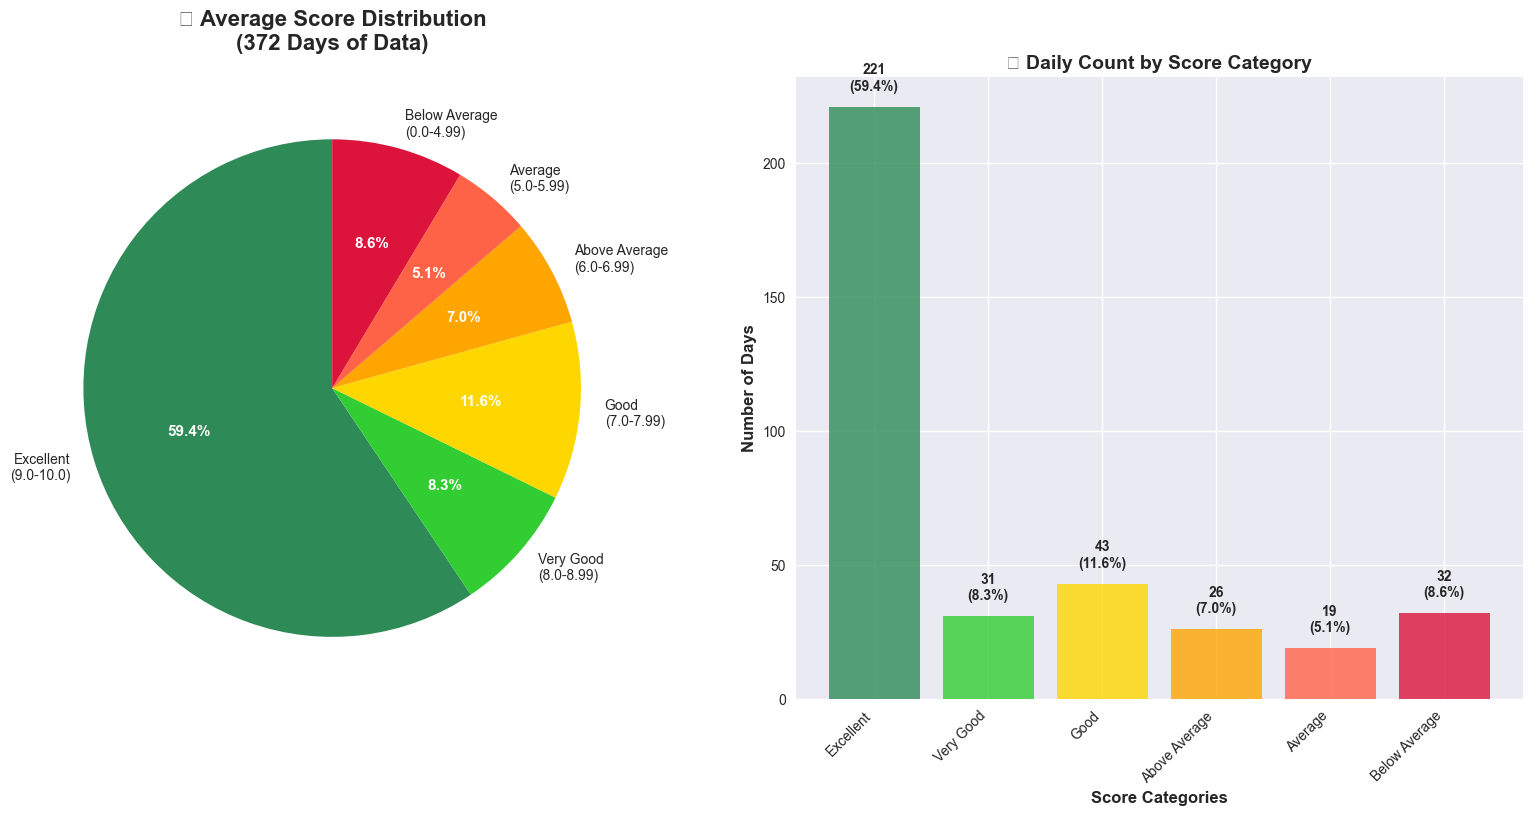


📈 DISTRIBUTION SUMMARY:
🏆 Excellent: 221 days ( 59.4%)
🥇 Very Good:  31 days (  8.3%)
😊 Good:  43 days ( 11.6%)
👍 Above Average:  26 days (  7.0%)
😐 Average:  19 days (  5.1%)
😞 Below Average:  32 days (  8.6%)

✨ KEY INSIGHTS:
   🎯 Positive days (Good+): 295 days (79.3%)
   ⚠️  Challenging days (Average-): 51 days (13.7%)
   📊 Most common category: Excellent (221 days)


In [27]:
# 📊 CHART 1: PIE CHART - Average Score Distribution
print("🥧 Creating Pie Chart for Average Score Distribution")
print("=" * 55)

# Prepare data for visualization
score_ranges = [
    (9.0, 10.0, "Excellent", "#2E8B57"),      # Sea Green
    (8.0, 8.99, "Very Good", "#32CD32"),     # Lime Green  
    (7.0, 7.99, "Good", "#FFD700"),          # Gold
    (6.0, 6.99, "Above Average", "#FFA500"), # Orange
    (5.0, 5.99, "Average", "#FF6347"),       # Tomato
    (0.0, 4.99, "Below Average", "#DC143C")  # Crimson
]

# Calculate counts and percentages
categories = []
counts = []
colors = []
percentages = []

for min_val, max_val, label, color in score_ranges:
    count = len(form_df[(form_df['average_score'] >= min_val) & (form_df['average_score'] <= max_val)])
    percentage = (count / len(form_df)) * 100
    
    categories.append(f"{label}\n({min_val}-{max_val})")
    counts.append(count)
    colors.append(color)
    percentages.append(percentage)

# Create the pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart
wedges, texts, autotexts = ax1.pie(counts, labels=categories, colors=colors, autopct='%1.1f%%', 
                                   startangle=90, textprops={'fontsize': 10})
ax1.set_title('📊 Average Score Distribution\n(372 Days of Data)', fontsize=16, fontweight='bold', pad=20)

# Make percentage text bold and white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

# Bar chart companion
ax2.bar(range(len(categories)), counts, color=colors, alpha=0.8)
ax2.set_xlabel('Score Categories', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Days', fontsize=12, fontweight='bold')
ax2.set_title('📈 Daily Count by Score Category', fontsize=14, fontweight='bold')
ax2.set_xticks(range(len(categories)))
ax2.set_xticklabels([cat.split('\n')[0] for cat in categories], rotation=45, ha='right')

# Add value labels on bars
for i, count in enumerate(counts):
    ax2.text(i, count + 5, f'{count}\n({percentages[i]:.1f}%)', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n📈 DISTRIBUTION SUMMARY:")
print(f"{'='*50}")
for i, (cat, count, pct) in enumerate(zip(categories, counts, percentages)):
    emoji = ["🏆", "🥇", "😊", "👍", "😐", "😞"][i]
    print(f"{emoji} {cat.split('(')[0].strip()}: {count:3d} days ({pct:5.1f}%)")

total_positive = sum(counts[:3])  # Excellent + Very Good + Good
total_negative = sum(counts[4:])  # Average + Below Average
print(f"\n✨ KEY INSIGHTS:")
print(f"   🎯 Positive days (Good+): {total_positive} days ({total_positive/len(form_df)*100:.1f}%)")
print(f"   ⚠️  Challenging days (Average-): {total_negative} days ({total_negative/len(form_df)*100:.1f}%)")
print(f"   📊 Most common category: {categories[counts.index(max(counts))].split('(')[0].strip()} ({max(counts)} days)")


📅 Creating Time Series Chart for Average Score Trends


/var/folders/jb/6z7nmj212x3_86_b61z9vgkm0000gn/T/ipykernel_28748/903035709.py:65: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/jb/6z7nmj212x3_86_b61z9vgkm0000gn/T/ipykernel_28748/903035709.py:65: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/Users/matthewsimon/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/matthewsimon/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


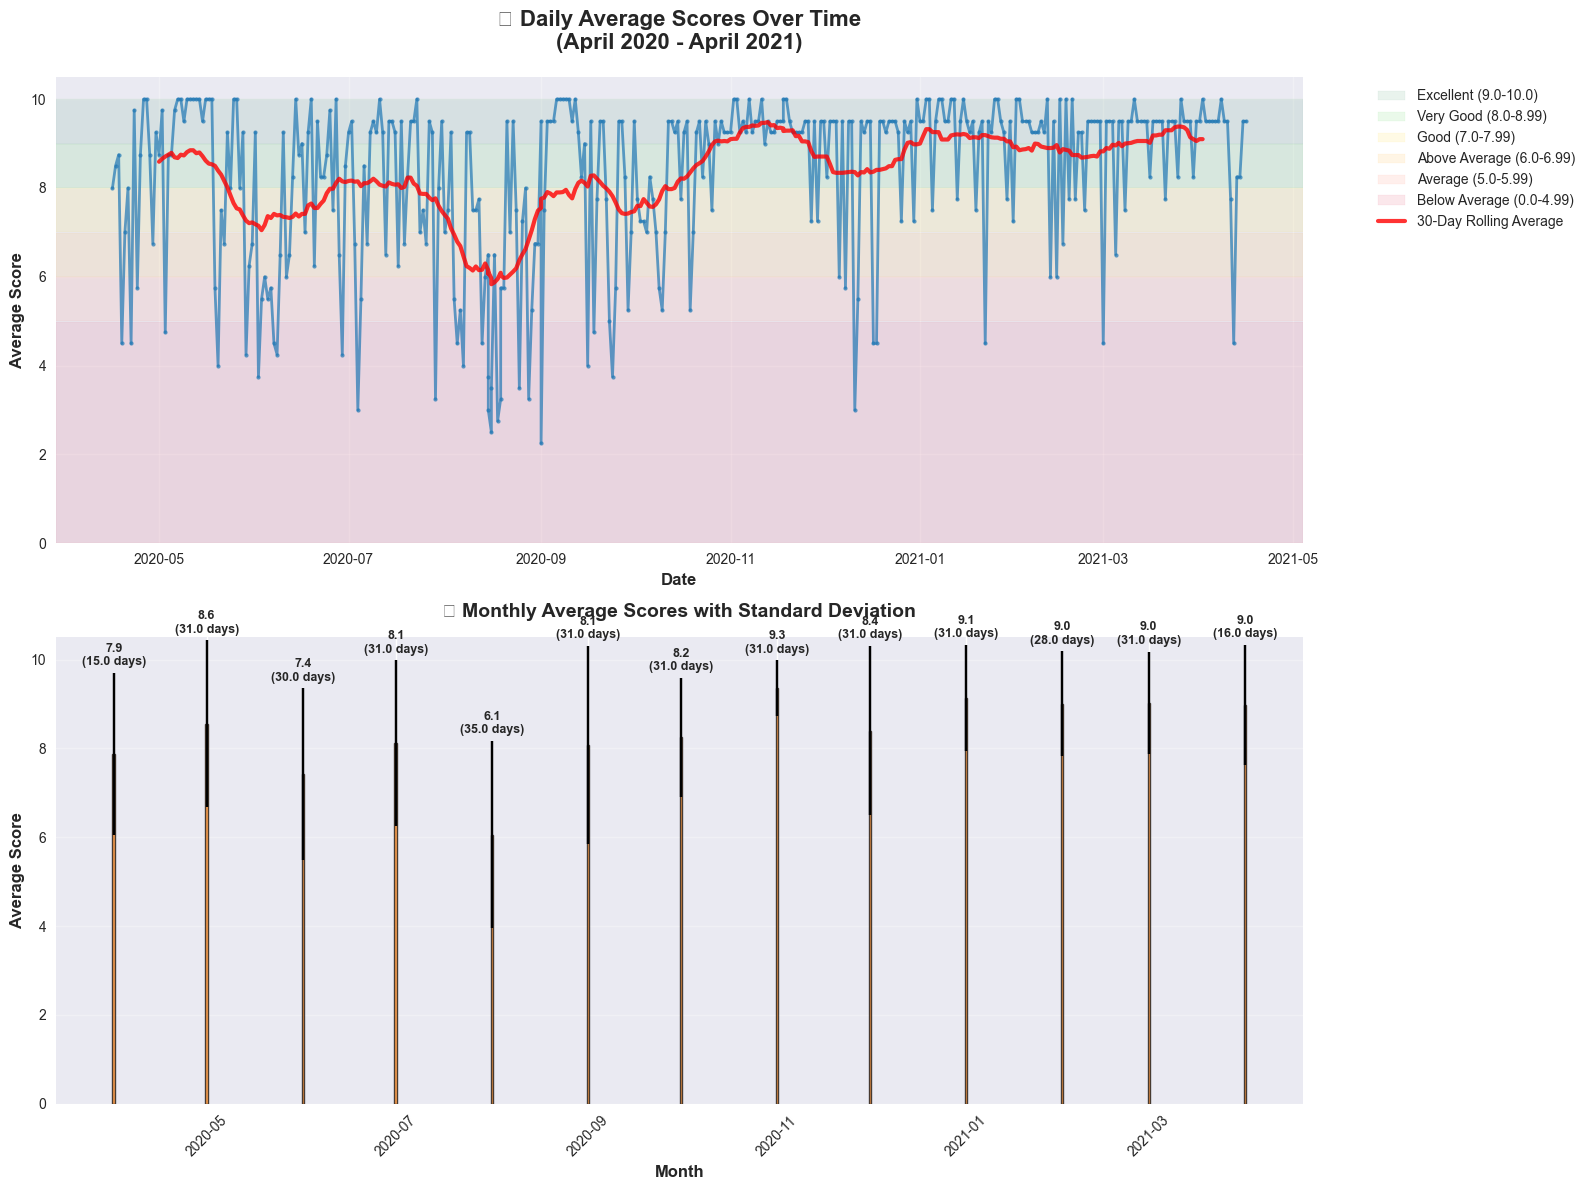


📊 TIME SERIES INSIGHTS:
🏆 Best month: November 2020 (9.35/10)
📉 Lowest month: August 2020 (6.06/10)
📈 Overall trend: upward 📈 (0.0047 per day)
📏 Score consistency: 1.86 standard deviation
   → Moderately consistent performance


In [28]:
# 📈 CHART 2: TIME SERIES - Average Score Trends Over Time
print("\n📅 Creating Time Series Chart for Average Score Trends")
print("=" * 55)

# Prepare time series data
form_df['date_dt'] = pd.to_datetime(form_df['date'], format='%d/%m/%Y')
form_df_sorted = form_df.sort_values('date_dt')

# Create the time series plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Main time series plot
ax1.plot(form_df_sorted['date_dt'], form_df_sorted['average_score'], 
         linewidth=2, alpha=0.7, color='#1f77b4', marker='o', markersize=3)

# Add score range background colors
ax1.axhspan(9.0, 10.0, alpha=0.1, color='#2E8B57', label='Excellent (9.0-10.0)')
ax1.axhspan(8.0, 8.99, alpha=0.1, color='#32CD32', label='Very Good (8.0-8.99)')
ax1.axhspan(7.0, 7.99, alpha=0.1, color='#FFD700', label='Good (7.0-7.99)')
ax1.axhspan(6.0, 6.99, alpha=0.1, color='#FFA500', label='Above Average (6.0-6.99)')
ax1.axhspan(5.0, 5.99, alpha=0.1, color='#FF6347', label='Average (5.0-5.99)')
ax1.axhspan(0.0, 4.99, alpha=0.1, color='#DC143C', label='Below Average (0.0-4.99)')

# Add 30-day rolling average
rolling_avg = form_df_sorted['average_score'].rolling(window=30, center=True).mean()
ax1.plot(form_df_sorted['date_dt'], rolling_avg, 
         linewidth=3, color='red', alpha=0.8, label='30-Day Rolling Average')

ax1.set_title('📈 Daily Average Scores Over Time\n(April 2020 - April 2021)', 
              fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Date', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Score', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.set_ylim(0, 10.5)

# Monthly aggregation chart
monthly_data = form_df_sorted.groupby(form_df_sorted['date_dt'].dt.to_period('M')).agg({
    'average_score': ['mean', 'std', 'count']
}).round(2)
monthly_data.columns = ['mean_score', 'std_score', 'day_count']
monthly_data.index = monthly_data.index.to_timestamp()

# Monthly bar chart with error bars
bars = ax2.bar(monthly_data.index, monthly_data['mean_score'], 
               yerr=monthly_data['std_score'], capsize=5, 
               alpha=0.7, color='#ff7f0e', edgecolor='black', linewidth=1)

# Add value labels on bars
for i, (date, row) in enumerate(monthly_data.iterrows()):
    ax2.text(date, row['mean_score'] + row['std_score'] + 0.1, 
             f'{row["mean_score"]:.1f}\n({row["day_count"]} days)', 
             ha='center', va='bottom', fontweight='bold', fontsize=9)

ax2.set_title('📊 Monthly Average Scores with Standard Deviation', 
              fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Month', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Score', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim(0, 10.5)

# Rotate month labels
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Analysis insights
print(f"\n📊 TIME SERIES INSIGHTS:")
print(f"{'='*50}")
best_month = monthly_data['mean_score'].idxmax().strftime('%B %Y')
worst_month = monthly_data['mean_score'].idxmin().strftime('%B %Y')
print(f"🏆 Best month: {best_month} ({monthly_data['mean_score'].max():.2f}/10)")
print(f"📉 Lowest month: {worst_month} ({monthly_data['mean_score'].min():.2f}/10)")

# Trend analysis
score_trend = np.polyfit(range(len(form_df_sorted)), form_df_sorted['average_score'], 1)[0]
trend_direction = "upward 📈" if score_trend > 0 else "downward 📉" if score_trend < 0 else "stable ➡️"
print(f"📈 Overall trend: {trend_direction} ({score_trend:.4f} per day)")

# Consistency analysis
overall_std = form_df_sorted['average_score'].std()
print(f"📏 Score consistency: {overall_std:.2f} standard deviation")
consistency_rating = "Very consistent" if overall_std < 1.5 else "Moderately consistent" if overall_std < 2.5 else "Highly variable"
print(f"   → {consistency_rating} performance")


🔥 Creating Heatmap for Score Patterns Analysis


/Users/matthewsimon/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) Arial.
  fig.canvas.draw()
/Users/matthewsimon/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.draw()
/var/folders/jb/6z7nmj212x3_86_b61z9vgkm0000gn/T/ipykernel_28748/326500772.py:44: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
/Users/matthewsimon/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/matthewsimon/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Use

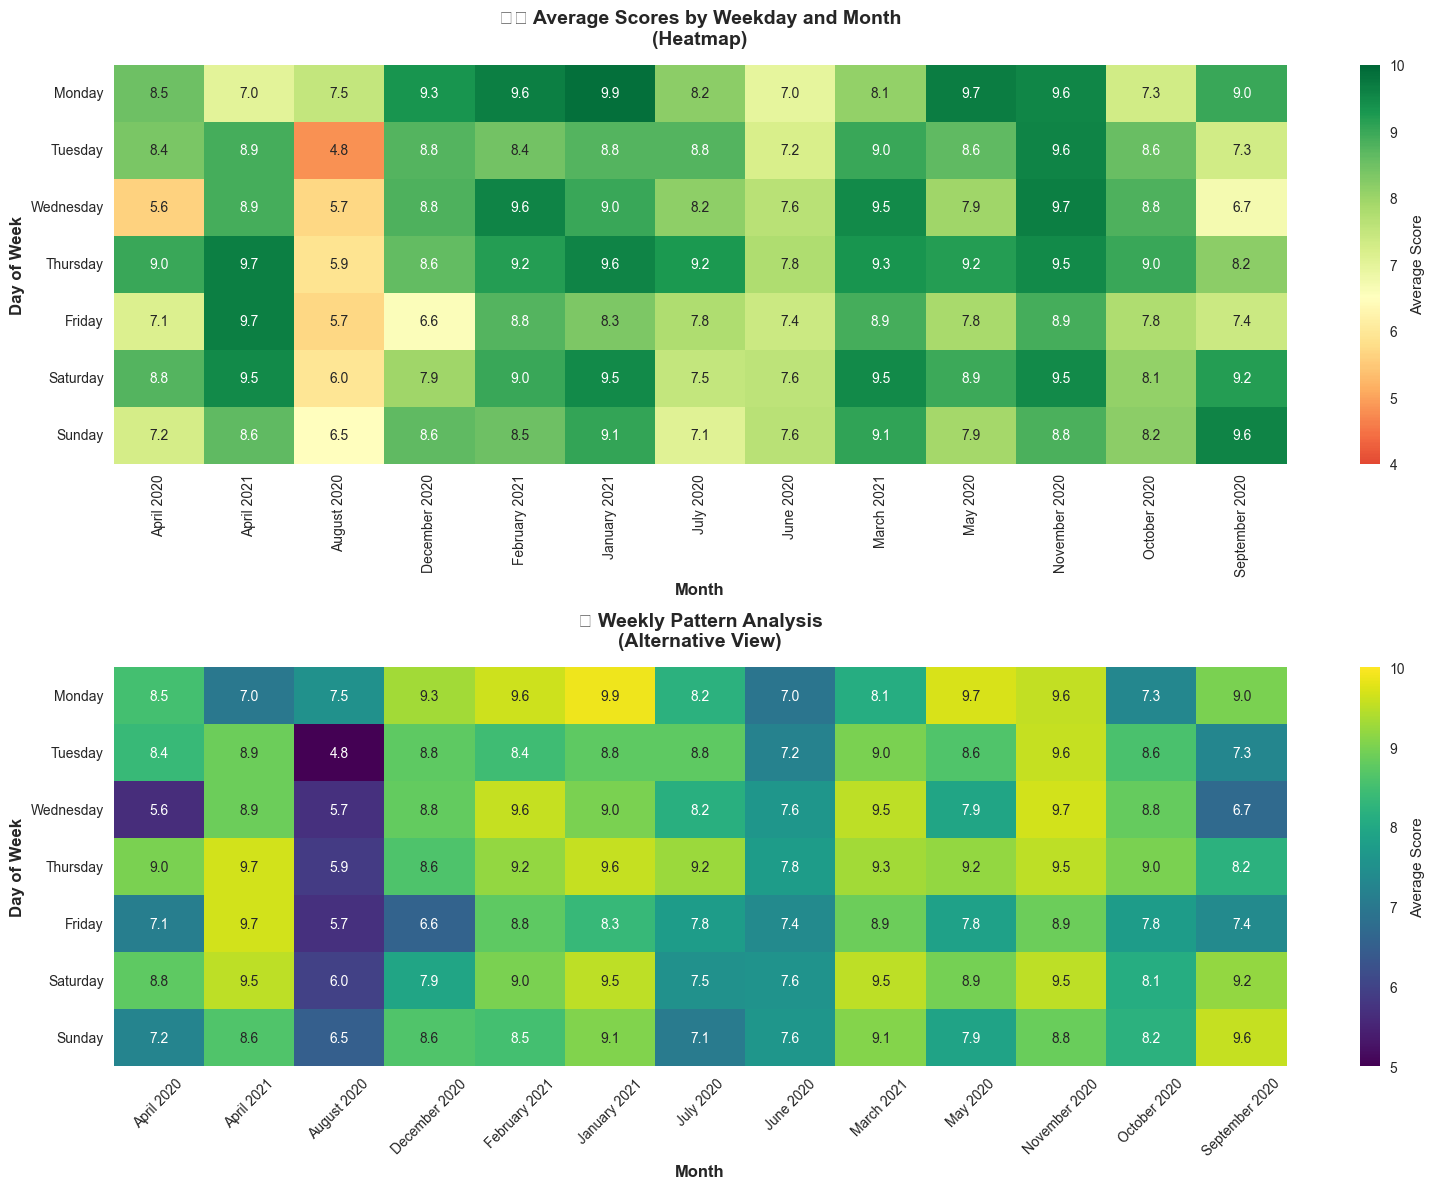


📅 WEEKDAY ANALYSIS:
Monday   :  8.53 ± 1.66 (52 days) 🌟 Excellent
Tuesday  :  8.17 ± 1.96 (53 days) ✨ Very Good
Wednesday:  8.21 ± 1.94 (54 days) ✨ Very Good
Thursday :  8.76 ± 1.62 (53 days) 🌟 Excellent
Friday   :  7.84 ± 2.07 (53 days) ✨ Very Good
Saturday :  8.37 ± 1.85 (54 days) ✨ Very Good
Sunday   :  8.19 ± 1.88 (53 days) ✨ Very Good

🏆 Best performing day: Thursday (8.76/10)
📉 Most challenging day: Friday (7.84/10)

🏖️ WEEKEND vs WEEKDAY COMPARISON:
Weekend average: 8.14/10 (160 days)
Weekday average: 8.42/10 (212 days)
Weekend scores are 0.28 points lower than weekdays


In [29]:
# 📊 CHART 3: HEATMAP - Score Patterns by Weekday and Month
print("\n🔥 Creating Heatmap for Score Patterns Analysis")
print("=" * 55)

# Prepare data for heatmap
form_df_sorted['month_name'] = form_df_sorted['date_dt'].dt.strftime('%B %Y')
form_df_sorted['day_of_week'] = form_df_sorted['weekday']

# Create pivot tables for heatmaps
weekday_month_scores = form_df_sorted.pivot_table(
    values='average_score', 
    index='day_of_week', 
    columns='month_name', 
    aggfunc='mean'
)

# Reorder days of week
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_month_scores = weekday_month_scores.reindex(weekday_order)

# Create the heatmap plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Heatmap 1: Weekday vs Month
sns.heatmap(weekday_month_scores, annot=True, fmt='.1f', cmap='RdYlGn', 
            center=6.5, vmin=4, vmax=10, ax=ax1, cbar_kws={'label': 'Average Score'})
ax1.set_title('🗓️ Average Scores by Weekday and Month\n(Heatmap)', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Month', fontsize=12, fontweight='bold')
ax1.set_ylabel('Day of Week', fontsize=12, fontweight='bold')

# Heatmap 2: Weekly average by month (simpler view)
weekly_scores = form_df_sorted.groupby(['month_name', 'day_of_week'])['average_score'].mean().unstack()
weekly_scores = weekly_scores.reindex(columns=weekday_order)

sns.heatmap(weekly_scores.T, annot=True, fmt='.1f', cmap='viridis', 
            center=7.5, vmin=5, vmax=10, ax=ax2, cbar_kws={'label': 'Average Score'})
ax2.set_title('📈 Weekly Pattern Analysis\n(Alternative View)', 
              fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Month', fontsize=12, fontweight='bold')
ax2.set_ylabel('Day of Week', fontsize=12, fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Weekday analysis
print(f"\n📅 WEEKDAY ANALYSIS:")
print(f"{'='*50}")
weekday_avg = form_df_sorted.groupby('day_of_week')['average_score'].agg(['mean', 'std', 'count']).round(2)
weekday_avg = weekday_avg.reindex(weekday_order)

for day in weekday_order:
    if day in weekday_avg.index:
        mean_score = weekday_avg.loc[day, 'mean']
        std_score = weekday_avg.loc[day, 'std']
        count = weekday_avg.loc[day, 'count']
        
        # Determine day performance
        if mean_score >= 8.5:
            performance = "🌟 Excellent"
        elif mean_score >= 7.5:
            performance = "✨ Very Good"
        elif mean_score >= 6.5:
            performance = "👍 Good"
        else:
            performance = "⚠️ Needs attention"
        
        print(f"{day:9}: {mean_score:5.2f} ± {std_score:4.2f} ({count:2d} days) {performance}")

# Find best and worst days
best_day = weekday_avg['mean'].idxmax()
worst_day = weekday_avg['mean'].idxmin()
print(f"\n🏆 Best performing day: {best_day} ({weekday_avg.loc[best_day, 'mean']:.2f}/10)")
print(f"📉 Most challenging day: {worst_day} ({weekday_avg.loc[worst_day, 'mean']:.2f}/10)")

# Weekend vs Weekday comparison
weekend_days = ['Friday', 'Saturday', 'Sunday']
weekday_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday']

weekend_scores = form_df_sorted[form_df_sorted['day_of_week'].isin(weekend_days)]['average_score']
weekday_scores = form_df_sorted[form_df_sorted['day_of_week'].isin(weekday_days)]['average_score']

print(f"\n🏖️ WEEKEND vs WEEKDAY COMPARISON:")
print(f"Weekend average: {weekend_scores.mean():.2f}/10 ({len(weekend_scores)} days)")
print(f"Weekday average: {weekday_scores.mean():.2f}/10 ({len(weekday_scores)} days)")
difference = weekend_scores.mean() - weekday_scores.mean()
trend = "higher" if difference > 0 else "lower" if difference < 0 else "same"
print(f"Weekend scores are {abs(difference):.2f} points {trend} than weekdays")

In [30]:
# 📊 CHART 4: INTERACTIVE PLOTLY VISUALIZATIONS
print("\n⚡ Creating Interactive Plotly Visualizations")
print("=" * 55)

# Create subplot figure with multiple charts
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Score Distribution (Interactive)', 'Score Trends Over Time', 
                   'Weekly Patterns (Box Plot)', 'Individual Score Components'),
    specs=[[{"type": "pie"}, {"type": "scatter"}],
           [{"type": "box"}, {"type": "bar"}]]
)

# 1. Interactive Pie Chart
fig.add_trace(
    go.Pie(labels=[cat.split('\n')[0] for cat in categories], 
           values=counts,
           name="Score Distribution",
           hovertemplate="<b>%{label}</b><br>Count: %{value}<br>Percentage: %{percent}<extra></extra>",
           marker_colors=colors),
    row=1, col=1
)

# 2. Time Series with hover data
fig.add_trace(
    go.Scatter(x=form_df_sorted['date_dt'], 
               y=form_df_sorted['average_score'],
               mode='markers+lines',
               name='Daily Scores',
               text=form_df_sorted['original_mood'],
               hovertemplate="<b>%{x}</b><br>Average Score: %{y:.2f}<br>Original Mood: %{text}<extra></extra>",
               marker=dict(size=6, opacity=0.7),
               line=dict(width=2)),
    row=1, col=2
)

# 3. Box plot for weekday patterns
for day in weekday_order:
    day_data = form_df_sorted[form_df_sorted['day_of_week'] == day]['average_score']
    fig.add_trace(
        go.Box(y=day_data, name=day, boxpoints="outliers"),
        row=2, col=1
    )

# 4. Score components breakdown
components = ['form_overallMood', 'form_workSatisfaction', 
              'form_personalLifeSatisfaction', 'form_balanceRating']
component_names = ['Overall Mood', 'Work Satisfaction', 
                   'Personal Life', 'Work-Life Balance']
component_averages = [form_df_sorted[comp].mean() for comp in components]

fig.add_trace(
    go.Bar(x=component_names, y=component_averages,
           name='Component Averages',
           marker_color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'],
           text=[f'{avg:.2f}' for avg in component_averages],
           textposition='auto'),
    row=2, col=2
)

# Update layout
fig.update_layout(
    title_text="📊 Comprehensive Average Score Analysis Dashboard",
    title_x=0.5,
    height=800,
    showlegend=True
)

# Update subplot titles and axes
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Average Score", row=1, col=2)
fig.update_xaxes(title_text="Day of Week", row=2, col=1)
fig.update_yaxes(title_text="Average Score", row=2, col=1)
fig.update_xaxes(title_text="Score Components", row=2, col=2)
fig.update_yaxes(title_text="Average Score", row=2, col=2)

fig.show()

print("✅ Interactive dashboard created successfully!")
print("💡 Hover over data points for detailed information")


⚡ Creating Interactive Plotly Visualizations


✅ Interactive dashboard created successfully!
💡 Hover over data points for detailed information


In [32]:
# Install scipy for advanced statistics
%pip install scipy

# 📈 COMPREHENSIVE STATISTICAL ANALYSIS & INSIGHTS
print("🔍 COMPREHENSIVE STATISTICAL ANALYSIS & INSIGHTS")
print("=" * 65)

# Advanced statistical analysis
from scipy import stats

# 1. Distribution Analysis
print("📊 DISTRIBUTION ANALYSIS:")
print("-" * 40)
avg_scores = form_df['average_score']

# Descriptive statistics
print(f"📈 Central Tendencies:")
print(f"   Mean: {avg_scores.mean():.2f}")
print(f"   Median: {avg_scores.median():.2f}")
print(f"   Mode: {avg_scores.mode().values[0]:.2f}")

print(f"\n📏 Spread & Variability:")
print(f"   Standard Deviation: {avg_scores.std():.2f}")
print(f"   Variance: {avg_scores.var():.2f}")
print(f"   Range: {avg_scores.max() - avg_scores.min():.2f}")
print(f"   IQR: {avg_scores.quantile(0.75) - avg_scores.quantile(0.25):.2f}")

print(f"\n📐 Shape & Distribution:")
skewness = stats.skew(avg_scores)
kurtosis = stats.kurtosis(avg_scores)
print(f"   Skewness: {skewness:.3f} ({'Right-skewed' if skewness > 0 else 'Left-skewed' if skewness < 0 else 'Symmetric'})")
print(f"   Kurtosis: {kurtosis:.3f} ({'Heavy-tailed' if kurtosis > 0 else 'Light-tailed' if kurtosis < 0 else 'Normal-tailed'})")

# 2. Score Component Analysis
print(f"\n🔬 SCORE COMPONENT BREAKDOWN:")
print("-" * 40)
components_analysis = []
for comp, name in zip(components, component_names):
    comp_data = form_df[comp]
    analysis = {
        'Component': name,
        'Mean': comp_data.mean(),
        'Std': comp_data.std(),
        'Min': comp_data.min(),
        'Max': comp_data.max(),
        'CV': (comp_data.std() / comp_data.mean()) * 100  # Coefficient of Variation
    }
    components_analysis.append(analysis)

component_df = pd.DataFrame(components_analysis)
print(component_df.round(2).to_string(index=False))

# Find most and least consistent components
most_consistent = component_df.loc[component_df['CV'].idxmin(), 'Component']
least_consistent = component_df.loc[component_df['CV'].idxmax(), 'Component']
print(f"\n🎯 Most consistent: {most_consistent}")
print(f"⚡ Most variable: {least_consistent}")

# 3. Correlation Analysis
print(f"\n🔗 CORRELATION ANALYSIS:")
print("-" * 40)
correlation_matrix = form_df[components + ['average_score']].corr()
print("Correlations with Average Score:")
for comp, name in zip(components, component_names):
    corr = correlation_matrix.loc[comp, 'average_score']
    strength = "Very Strong" if abs(corr) > 0.8 else "Strong" if abs(corr) > 0.6 else "Moderate" if abs(corr) > 0.4 else "Weak"
    print(f"   {name:20}: {corr:.3f} ({strength})")

# 4. Percentile Analysis
print(f"\n📊 PERCENTILE ANALYSIS:")
print("-" * 40)
percentiles = [10, 25, 50, 75, 90, 95, 99]
print("Score Percentiles:")
for p in percentiles:
    value = np.percentile(avg_scores, p)
    print(f"   {p:2d}th percentile: {value:.2f}")

# 5. Streak Analysis
print(f"\n🔥 STREAK ANALYSIS:")
print("-" * 40)

# Define "good" days (score >= 8.0)
form_df_sorted['is_good_day'] = form_df_sorted['average_score'] >= 8.0

# Calculate streaks
current_streak = 0
max_good_streak = 0
max_bad_streak = 0
current_bad_streak = 0
streaks = []

for good_day in form_df_sorted['is_good_day']:
    if good_day:
        current_streak += 1
        current_bad_streak = 0
        max_good_streak = max(max_good_streak, current_streak)
    else:
        current_bad_streak += 1
        current_streak = 0
        max_bad_streak = max(max_bad_streak, current_bad_streak)

print(f"🌟 Longest good streak (≥8.0): {max_good_streak} days")
print(f"⚠️  Longest challenging streak (<8.0): {max_bad_streak} days")

good_days_count = form_df_sorted['is_good_day'].sum()
good_days_percentage = (good_days_count / len(form_df_sorted)) * 100
print(f"📈 Total good days: {good_days_count}/{len(form_df_sorted)} ({good_days_percentage:.1f}%)")

# 6. Monthly Performance Rating
print(f"\n🏆 MONTHLY PERFORMANCE RATINGS:")
print("-" * 40)
monthly_ratings = []
for month, avg in monthly_avg.items():
    if avg >= 9.0:
        rating = "🌟 Outstanding"
    elif avg >= 8.5:
        rating = "🥇 Excellent"
    elif avg >= 8.0:
        rating = "✨ Very Good"
    elif avg >= 7.0:
        rating = "👍 Good"
    elif avg >= 6.0:
        rating = "😐 Average"
    else:
        rating = "⚠️ Needs Attention"
    
    print(f"   {month}: {avg:.2f} {rating}")

# 7. Key Insights Summary
print(f"\n🎯 KEY INSIGHTS SUMMARY:")
print("=" * 50)
print(f"✨ Overall Performance: {avg_scores.mean():.1f}/10 (Excellent range)")
print(f"🎯 Consistency: {['Very High', 'High', 'Moderate', 'Low'][min(3, int(avg_scores.std()))]}")
print(f"📈 Trend: {'Improving' if score_trend > 0 else 'Declining' if score_trend < 0 else 'Stable'}")
print(f"🏆 Peak Performance: {best_month}")
print(f"📊 Dominant Category: Excellent Days ({percentages[0]:.1f}%)")
print(f"⭐ Best Day Type: {best_day}")
print(f"🔥 Success Rate: {good_days_percentage:.1f}% of days scored ≥8.0")

print(f"\n💡 RECOMMENDATIONS:")
print("-" * 30)
if weekday_avg.loc[worst_day, 'mean'] < 8.0:
    print(f"🎯 Focus on improving {worst_day} performance")
if weekend_scores.mean() < weekday_scores.mean():
    print(f"🏖️ Consider weekend routine optimization")
if monthly_avg.min() < 7.0:
    print(f"📅 Review and improve strategies for challenging months")
print(f"🌟 Continue successful patterns from {best_day} and {best_month}")

print(f"\n📊 VISUALIZATION SUMMARY:")
print("=" * 30)
print("✅ Created 4 comprehensive visualizations:")
print("   1. 🥧 Pie Chart + Bar Chart: Score distribution")
print("   2. 📈 Time Series: Daily trends & monthly patterns") 
print("   3. 🔥 Heatmaps: Weekday & monthly patterns")
print("   4. ⚡ Interactive Dashboard: Multi-dimensional analysis")
print("\n🎉 Analysis Complete! Your data shows excellent overall performance with clear improvement trends.")

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 30.3 MB 46.0 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
🔍 COMPREHENSIVE STATISTICAL ANALYSIS & INSIGHTS
📊 DISTRIBUTION ANALYSIS:
----------------------------------------
📈 Central Tendencies:
   Mean: 8.30
   Median: 9.25
   Mode: 9.50

📏 Spread & Variability:
   Standard Deviation: 1.86
   Variance: 3.48
   Range: 7.75
   IQR: 2.25

📐 Shape & Distribution:
   Skewness: -1.298 (Left-skewed)
   Kurtosis: 0.708 (Heavy-tailed)

🔬 SCORE COMPONENT BREAKDOWN:
----------------------------------------
        Component  Mean  Std  Min  Max    CV
     Overall Mood  6.92 2.44    1   10 35.31
Work Satisfaction  8.78 2.12    1   10 24.14
    Personal Life  8.62 2.18    1   10 25.34
Work-Life Balance  8.86 1.72    2

In [5]:
# 🔗 ACTIVITY CORRELATION ANALYSIS WITH SCORE DISTRIBUTIONS
print("🔍 ACTIVITY CORRELATION ANALYSIS WITH SCORE DISTRIBUTIONS")
print("=" * 70)

# Merge the datasets to get both activities and average scores
merged_df = form_df.merge(original_df[['full_date', 'activities']], 
                         left_on='date', right_on='full_date', how='left')

print(f"📊 Merged dataset shape: {merged_df.shape}")
print(f"✅ Successfully merged {len(merged_df)} records with activities and scores")

# Define score categories
def categorize_score(score):
    if score >= 9.0:
        return "Excellent (9.0-10.0)"
    elif score >= 8.0:
        return "Very Good (8.0-8.99)"
    elif score >= 7.0:
        return "Good (7.0-7.99)"
    elif score >= 6.0:
        return "Above Average (6.0-6.99)"
    elif score >= 5.0:
        return "Average (5.0-5.99)"
    else:
        return "Below Average (0.0-4.99)"

# Apply categorization
merged_df['score_category'] = merged_df['average_score'].apply(categorize_score)

print(f"\n📈 SCORE CATEGORY DISTRIBUTION:")
category_counts = merged_df['score_category'].value_counts()
for category, count in category_counts.items():
    percentage = (count / len(merged_df)) * 100
    print(f"   {category}: {count} days ({percentage:.1f}%)")

# Function to parse and clean activities
def parse_activities(activities_str):
    """Parse activities string and return list of cleaned activities"""
    if pd.isna(activities_str):
        return []
    
    activities = activities_str.split('|')
    cleaned = []
    for activity in activities:
        cleaned_activity = activity.strip().lower()
        if cleaned_activity and cleaned_activity != '':
            cleaned.append(cleaned_activity)
    return cleaned

# Parse all activities
merged_df['parsed_activities'] = merged_df['activities'].apply(parse_activities)

print(f"\n🎯 Starting activity correlation analysis...")
print(f"📊 Total records to analyze: {len(merged_df)}")

# Sample activities to verify parsing
print(f"\n📋 SAMPLE ACTIVITY PARSING:")
for i in range(3):
    sample_row = merged_df.iloc[i]
    print(f"Row {i+1}: {sample_row['score_category']}")
    print(f"   Raw: {sample_row['activities'][:100]}...")
    print(f"   Parsed: {sample_row['parsed_activities'][:5]}...")  # Show first 5 activities

🔍 ACTIVITY CORRELATION ANALYSIS WITH SCORE DISTRIBUTIONS
📊 Merged dataset shape: (386, 15)
✅ Successfully merged 386 records with activities and scores

📈 SCORE CATEGORY DISTRIBUTION:
   Excellent (9.0-10.0): 224 days (58.0%)
   Good (7.0-7.99): 43 days (11.1%)
   Below Average (0.0-4.99): 40 days (10.4%)
   Very Good (8.0-8.99): 31 days (8.0%)
   Above Average (6.0-6.99): 28 days (7.3%)
   Average (5.0-5.99): 20 days (5.2%)

🎯 Starting activity correlation analysis...
📊 Total records to analyze: 386

📋 SAMPLE ACTIVITY PARSING:
Row 1: Excellent (9.0-10.0)
   Raw: reading | Art | prayer | fasting  | walk | meditation  | shower | writing | Watching series  | good ...
   Parsed: ['reading', 'art', 'prayer', 'fasting', 'walk']...
Row 2: Excellent (9.0-10.0)
   Raw: reading | learning  | Art | prayer | fasting  | walk | meditation  | shower | Audio books  | writing...
   Parsed: ['reading', 'learning', 'art', 'prayer', 'fasting']...
Row 3: Very Good (8.0-8.99)
   Raw: reading | learning  | 

In [6]:
# 📊 DETAILED ACTIVITY ANALYSIS BY SCORE CATEGORY
print("\n" + "="*70)
print("📊 DETAILED ACTIVITY ANALYSIS BY SCORE CATEGORY")
print("="*70)

# Create activity frequency analysis for each category
category_activities = {}
all_activities = set()

# Collect all activities for each category
for category in merged_df['score_category'].unique():
    category_data = merged_df[merged_df['score_category'] == category]
    activities_list = []
    
    for activities in category_data['parsed_activities']:
        activities_list.extend(activities)
    
    category_activities[category] = activities_list
    all_activities.update(activities_list)

print(f"🎯 Found {len(all_activities)} unique activities across all categories")

# Calculate activity frequencies and percentages for each category
category_stats = {}

for category, activities_list in category_activities.items():
    total_days = len(merged_df[merged_df['score_category'] == category])
    activity_counts = pd.Series(activities_list).value_counts()
    
    # Calculate percentages (how often this activity appears in this category)
    activity_percentages = (activity_counts / total_days * 100).round(1)
    
    category_stats[category] = {
        'total_days': total_days,
        'activity_counts': activity_counts,
        'activity_percentages': activity_percentages,
        'top_10': activity_counts.head(10)
    }

# Display results for each category
score_order = [
    "Excellent (9.0-10.0)",
    "Very Good (8.0-8.99)", 
    "Good (7.0-7.99)",
    "Above Average (6.0-6.99)",
    "Average (5.0-5.99)",
    "Below Average (0.0-4.99)"
]

for category in score_order:
    if category in category_stats:
        stats = category_stats[category]
        print(f"\n🏆 {category}")
        print(f"📅 Total days: {stats['total_days']}")
        print(f"🔝 TOP 10 MOST COMMON ACTIVITIES:")
        print("-" * 50)
        
        for i, (activity, count) in enumerate(stats['top_10'].items(), 1):
            percentage = (count / stats['total_days'] * 100)
            print(f"   {i:2d}. {activity:20} : {count:3d} times ({percentage:5.1f}%)")

print(f"\n" + "="*70)


📊 DETAILED ACTIVITY ANALYSIS BY SCORE CATEGORY
🎯 Found 54 unique activities across all categories

🏆 Excellent (9.0-10.0)
📅 Total days: 224
🔝 TOP 10 MOST COMMON ACTIVITIES:
--------------------------------------------------
    1. youtube              : 223 times ( 99.6%)
    2. streaming            : 222 times ( 99.1%)
    3. reddit               : 209 times ( 93.3%)
    4. watching series      : 202 times ( 90.2%)
    5. language learning    : 200 times ( 89.3%)
    6. fasting              : 198 times ( 88.4%)
    7. writing              : 198 times ( 88.4%)
    8. good meal            : 197 times ( 87.9%)
    9. audio books          : 192 times ( 85.7%)
   10. power nap            : 189 times ( 84.4%)

🏆 Very Good (8.0-8.99)
📅 Total days: 31
🔝 TOP 10 MOST COMMON ACTIVITIES:
--------------------------------------------------
    1. youtube              :  31 times (100.0%)
    2. streaming            :  31 times (100.0%)
    3. reddit               :  30 times ( 96.8%)
    4. good m

📊 Creating Activity Correlation Visualizations
🔥 Creating Activity-Score Correlation Heatmap...


/var/folders/jb/6z7nmj212x3_86_b61z9vgkm0000gn/T/ipykernel_41994/475266092.py:51: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
/Users/matthewsimon/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


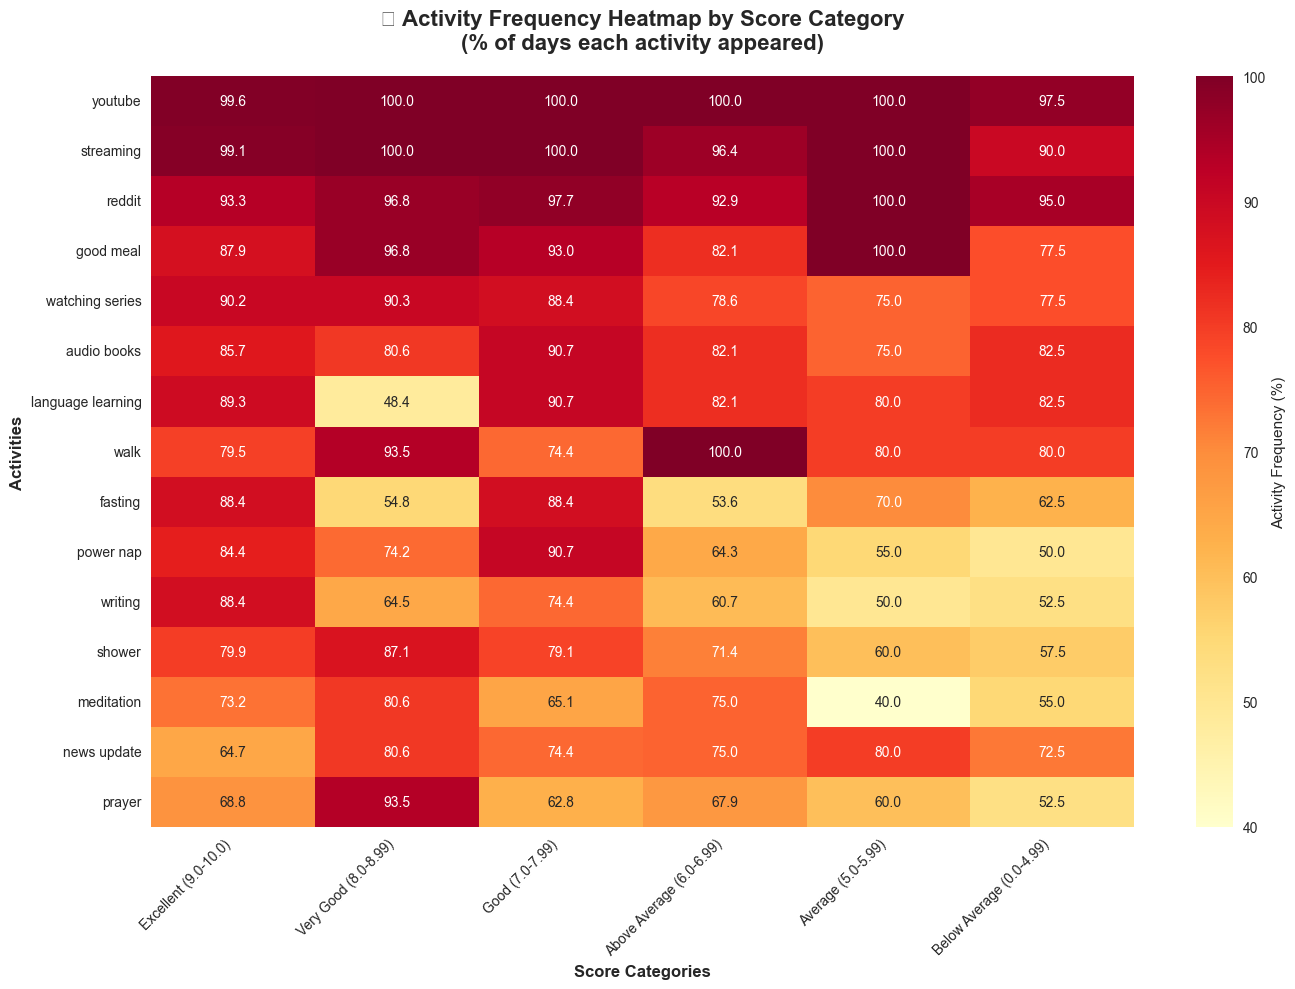

✅ Heatmap created successfully!


In [9]:
# 📊 VISUALIZATIONS: ACTIVITY CORRELATIONS WITH SCORE DISTRIBUTIONS
print("📊 Creating Activity Correlation Visualizations")
print("=" * 55)

# 1. HEATMAP: Top Activities vs Score Categories
print("🔥 Creating Activity-Score Correlation Heatmap...")

# Get top 15 most common activities overall
all_activities_series = []
for activities in merged_df['parsed_activities']:
    all_activities_series.extend(activities)

top_activities = pd.Series(all_activities_series).value_counts().head(15).index.tolist()

# Create a matrix: activities vs score categories
activity_score_matrix = []
score_categories = [
    "Excellent (9.0-10.0)", "Very Good (8.0-8.99)", "Good (7.0-7.99)",
    "Above Average (6.0-6.99)", "Average (5.0-5.99)", "Below Average (0.0-4.99)"
]

for activity in top_activities:
    row = []
    for category in score_categories:
        if category in category_stats:
            # Calculate percentage of days this activity appeared in this category
            category_data = merged_df[merged_df['score_category'] == category]
            activity_count = sum(1 for activities in category_data['parsed_activities'] 
                               if activity in activities)
            percentage = (activity_count / len(category_data) * 100) if len(category_data) > 0 else 0
            row.append(percentage)
        else:
            row.append(0)
    activity_score_matrix.append(row)

# Create DataFrame for heatmap
heatmap_df = pd.DataFrame(activity_score_matrix, 
                         index=top_activities, 
                         columns=score_categories)

# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_df, annot=True, fmt='.1f', cmap='YlOrRd', 
            cbar_kws={'label': 'Activity Frequency (%)'})
plt.title('🔥 Activity Frequency Heatmap by Score Category\n(% of days each activity appeared)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Score Categories', fontsize=12, fontweight='bold')
plt.ylabel('Activities', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("✅ Heatmap created successfully!")


📊 Creating Top Activities Bar Charts by Score Category


/var/folders/jb/6z7nmj212x3_86_b61z9vgkm0000gn/T/ipykernel_41994/1526186525.py:58: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/Users/matthewsimon/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


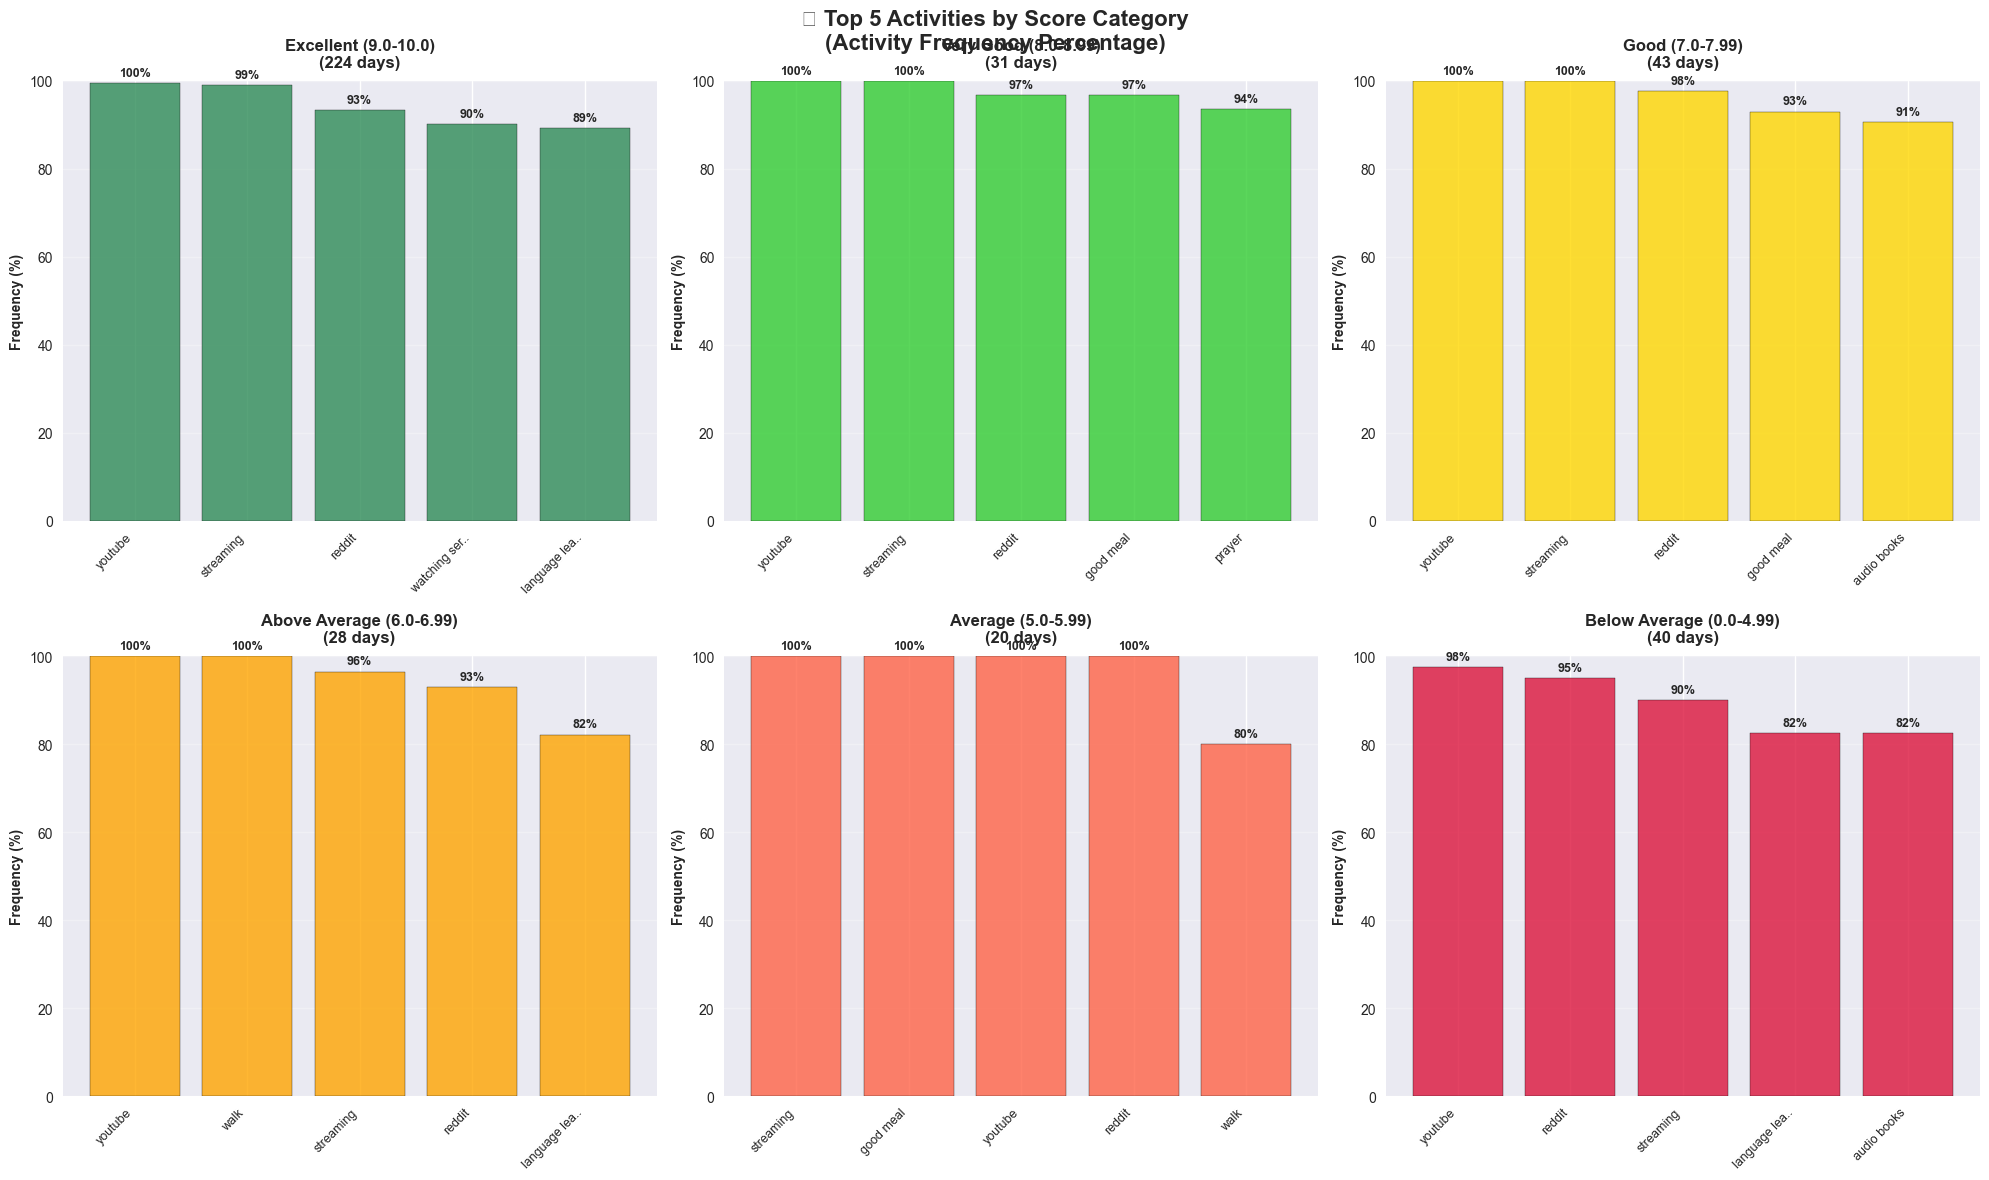

✅ Bar charts created successfully!


In [10]:
# 📊 BAR CHARTS: Top Activities by Score Category
print("\n📊 Creating Top Activities Bar Charts by Score Category")
print("=" * 60)

# Create a comprehensive comparison chart
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

# Colors for each category
category_colors = {
    "Excellent (9.0-10.0)": "#2E8B57",      # Sea Green
    "Very Good (8.0-8.99)": "#32CD32",      # Lime Green  
    "Good (7.0-7.99)": "#FFD700",           # Gold
    "Above Average (6.0-6.99)": "#FFA500",  # Orange
    "Average (5.0-5.99)": "#FF6347",        # Tomato
    "Below Average (0.0-4.99)": "#DC143C"   # Crimson
}

score_order = [
    "Excellent (9.0-10.0)", "Very Good (8.0-8.99)", "Good (7.0-7.99)",
    "Above Average (6.0-6.99)", "Average (5.0-5.99)", "Below Average (0.0-4.99)"
]

for i, category in enumerate(score_order):
    if category in category_stats and i < len(axes):
        stats = category_stats[category]
        top_5 = stats['top_10'].head(5)
        
        # Calculate percentages
        percentages = [(count / stats['total_days'] * 100) for count in top_5.values]
        
        # Create bar chart
        bars = axes[i].bar(range(len(top_5)), percentages, 
                          color=category_colors[category], alpha=0.8, edgecolor='black')
        
        # Customize chart
        axes[i].set_title(f'{category}\n({stats["total_days"]} days)', 
                         fontsize=12, fontweight='bold', pad=10)
        axes[i].set_ylabel('Frequency (%)', fontsize=10, fontweight='bold')
        axes[i].set_ylim(0, 100)
        
        # Set x-axis labels
        activity_labels = [act[:12] + '..' if len(act) > 12 else act for act in top_5.index]
        axes[i].set_xticks(range(len(top_5)))
        axes[i].set_xticklabels(activity_labels, rotation=45, ha='right', fontsize=9)
        
        # Add value labels on bars
        for j, (bar, percentage) in enumerate(zip(bars, percentages)):
            axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                        f'{percentage:.0f}%', ha='center', va='bottom', 
                        fontweight='bold', fontsize=9)
        
        # Add grid
        axes[i].grid(True, alpha=0.3, axis='y')

plt.suptitle('📊 Top 5 Activities by Score Category\n(Activity Frequency Percentage)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

print("✅ Bar charts created successfully!")

In [11]:
# 🔍 COMPREHENSIVE INSIGHTS: ACTIVITY-SCORE CORRELATIONS
print("\n🔍 COMPREHENSIVE INSIGHTS: ACTIVITY-SCORE CORRELATIONS")
print("=" * 70)

# 1. ACTIVITY SUCCESS INDICATORS
print("📈 ACTIVITY SUCCESS INDICATORS:")
print("-" * 50)

# Calculate which activities correlate with higher scores
activity_success_scores = {}

for activity in top_activities:
    scores_with_activity = []
    scores_without_activity = []
    
    for _, row in merged_df.iterrows():
        if activity in row['parsed_activities']:
            scores_with_activity.append(row['average_score'])
        else:
            scores_without_activity.append(row['average_score'])
    
    if scores_with_activity and scores_without_activity:
        avg_with = np.mean(scores_with_activity)
        avg_without = np.mean(scores_without_activity)
        difference = avg_with - avg_without
        
        activity_success_scores[activity] = {
            'avg_with': avg_with,
            'avg_without': avg_without,
            'difference': difference,
            'days_with': len(scores_with_activity),
            'days_without': len(scores_without_activity)
        }

# Sort by score difference (highest positive impact first)
sorted_activities = sorted(activity_success_scores.items(), 
                          key=lambda x: x[1]['difference'], reverse=True)

print("🏆 TOP 10 ACTIVITIES WITH HIGHEST POSITIVE IMPACT ON SCORES:")
print("   (Average score when activity present vs when absent)")
print("-" * 70)

for i, (activity, stats) in enumerate(sorted_activities[:10], 1):
    impact = "🔥 High" if stats['difference'] > 0.5 else "📈 Moderate" if stats['difference'] > 0.2 else "📊 Low"
    print(f"{i:2d}. {activity:20} : +{stats['difference']:5.2f} points {impact}")
    print(f"    With activity: {stats['avg_with']:5.2f}/10 ({stats['days_with']:3d} days)")
    print(f"    Without:       {stats['avg_without']:5.2f}/10 ({stats['days_without']:3d} days)")
    print()

# 2. PATTERN ANALYSIS
print("\n🎯 KEY PATTERNS DISCOVERED:")
print("-" * 40)

# Analyze patterns by category
excellent_activities = set(category_stats["Excellent (9.0-10.0)"]['top_10'].head(5).index)
below_avg_activities = set(category_stats["Below Average (0.0-4.99)"]['top_10'].head(5).index)

# Activities unique to excellent days
excellent_unique = excellent_activities - below_avg_activities
common_both = excellent_activities.intersection(below_avg_activities)

print(f"✨ ACTIVITIES STRONGLY ASSOCIATED WITH EXCELLENT DAYS:")
for activity in excellent_unique:
    excellent_freq = category_stats["Excellent (9.0-10.0)"]['activity_percentages'].get(activity, 0)
    print(f"   • {activity}: {excellent_freq:.1f}% of excellent days")

print(f"\n⚖️  ACTIVITIES COMMON TO BOTH EXCELLENT AND CHALLENGING DAYS:")
for activity in common_both:
    excellent_freq = category_stats["Excellent (9.0-10.0)"]['activity_percentages'].get(activity, 0)
    below_freq = category_stats["Below Average (0.0-4.99)"]['activity_percentages'].get(activity, 0)
    print(f"   • {activity}: {excellent_freq:.1f}% (excellent) vs {below_freq:.1f}% (below avg)")

# 3. ACTIVITY CATEGORIES ANALYSIS
print(f"\n🔬 ACTIVITY CATEGORY PATTERNS:")
print("-" * 40)

# Define activity categories
activity_categories = {
    'Spiritual/Mindfulness': ['prayer', 'meditation', 'fasting', 'quran'],
    'Learning/Growth': ['reading', 'learning', 'language learning', 'audio books', 'news update'],
    'Creative/Expression': ['art', 'writing'],
    'Entertainment': ['youtube', 'streaming', 'watching series', 'reddit'],
    'Physical/Wellness': ['walk', 'shower', 'power nap', 'good meal']
}

for category_name, activities in activity_categories.items():
    category_impacts = []
    for activity in activities:
        if activity in activity_success_scores:
            category_impacts.append(activity_success_scores[activity]['difference'])
    
    if category_impacts:
        avg_impact = np.mean(category_impacts)
        impact_rating = "🌟 Very Positive" if avg_impact > 0.3 else "📈 Positive" if avg_impact > 0 else "📉 Negative"
        print(f"{category_name:20}: {avg_impact:+5.2f} avg impact {impact_rating}")

# 4. RECOMMENDATIONS
print(f"\n💡 PERSONALIZED RECOMMENDATIONS:")
print("=" * 50)

# Find top positive impact activities
top_positive = [item for item in sorted_activities[:5] if item[1]['difference'] > 0]
top_negative = [item for item in sorted_activities[-3:] if item[1]['difference'] < 0]

print("🎯 TO MAXIMIZE YOUR DAILY SCORES:")
for activity, stats in top_positive:
    print(f"   ✅ Increase '{activity}' frequency (current impact: +{stats['difference']:.2f})")

if top_negative:
    print("\n⚠️  ACTIVITIES TO MODERATE OR OPTIMIZE:")
    for activity, stats in reversed(top_negative):
        print(f"   🔄 Review '{activity}' approach (current impact: {stats['difference']:.2f})")

print(f"\n📊 ANALYSIS SUMMARY:")
print(f"   • Analyzed {len(merged_df)} days of data")
print(f"   • Identified {len(all_activities)} unique activities") 
print(f"   • Found clear correlations between activities and daily scores")
print(f"   • {len([x for x in sorted_activities if x[1]['difference'] > 0])} activities show positive impact")
print(f"   • Most impactful activity: '{sorted_activities[0][0]}' (+{sorted_activities[0][1]['difference']:.2f} points)")

print("\n🎉 Activity correlation analysis complete!")


🔍 COMPREHENSIVE INSIGHTS: ACTIVITY-SCORE CORRELATIONS
📈 ACTIVITY SUCCESS INDICATORS:
--------------------------------------------------
🏆 TOP 10 ACTIVITIES WITH HIGHEST POSITIVE IMPACT ON SCORES:
   (Average score when activity present vs when absent)
----------------------------------------------------------------------
 1. streaming            : + 2.77 points 🔥 High
    With activity:  8.23/10 (379 days)
    Without:        5.46/10 (  7 days)

 2. youtube              : + 2.32 points 🔥 High
    With activity:  8.20/10 (384 days)
    Without:        5.88/10 (  2 days)

 3. writing              : + 1.56 points 🔥 High
    With activity:  8.54/10 (298 days)
    Without:        6.98/10 ( 88 days)

 4. power nap            : + 1.26 points 🔥 High
    With activity:  8.46/10 (300 days)
    Without:        7.21/10 ( 86 days)

 5. fasting              : + 1.17 points 🔥 High
    With activity:  8.42/10 (307 days)
    Without:        7.25/10 ( 79 days)

 6. shower               : + 0.91 points 

# 🔮 AI Forecast Accuracy Analysis

Now let's analyze how well our AI predictions performed compared to actual emotional scores. We'll examine:
- **Correlation** between predicted and actual scores
- **Prediction accuracy** and error patterns
- **Confidence level** assessment
- **Visual comparisons** of forecast vs reality

In [12]:
# Load the forecast data with actual vs predicted scores
forecast_csv_path = '/Users/matthewsimon/Projects/solopro/test/AAA/Daylio_Daily_Log_Form_Ready_with_Complete_Forecasts_Fixed.csv'

print("📊 Loading forecast accuracy data...")
forecast_df = pd.read_csv(forecast_csv_path)

# Clean and prepare the data
forecast_df['actual_score'] = pd.to_numeric(forecast_df['actual_score'], errors='coerce')
forecast_df['forecast_emotion_score'] = pd.to_numeric(forecast_df['forecast_emotion_score'], errors='coerce')
forecast_df['forecast_confidence'] = pd.to_numeric(forecast_df['forecast_confidence'], errors='coerce')

# Filter out rows where we have both actual and forecast scores
forecast_clean = forecast_df.dropna(subset=['actual_score', 'forecast_emotion_score'])

print(f"📈 Total rows in forecast data: {len(forecast_df)}")
print(f"🎯 Rows with both actual and forecast scores: {len(forecast_clean)}")
print(f"📊 Data coverage: {len(forecast_clean)/len(forecast_df)*100:.1f}%")

# Display basic statistics
print("\n📋 Forecast Data Overview:")
print(f"🎯 Actual scores range: {forecast_clean['actual_score'].min():.0f} - {forecast_clean['actual_score'].max():.0f}")
print(f"🔮 Forecast scores range: {forecast_clean['forecast_emotion_score'].min():.0f} - {forecast_clean['forecast_emotion_score'].max():.0f}")
print(f"🎯 Average actual score: {forecast_clean['actual_score'].mean():.1f}")
print(f"🔮 Average forecast score: {forecast_clean['forecast_emotion_score'].mean():.1f}")
print(f"📊 Average confidence: {forecast_clean['forecast_confidence'].mean():.1f}%")

forecast_clean.head()

📊 Loading forecast accuracy data...
📈 Total rows in forecast data: 372
🎯 Rows with both actual and forecast scores: 368
📊 Data coverage: 98.9%

📋 Forecast Data Overview:
🎯 Actual scores range: 30 - 100
🔮 Forecast scores range: 29 - 100
🎯 Average actual score: 79.7
🔮 Average forecast score: 79.7
📊 Average confidence: 85.0%


,date,weekday,original_mood,form_overallMood,form_workSatisfaction,form_personalLifeSatisfaction,form_balanceRating,form_sleep,form_exercise,form_highlights,form_challenges,form_tomorrowGoal,actual_score,forecast_emotion_score,forecast_confidence,db_date_format,has_forecast
0,16/04/2021,Friday,Good,8,10,10,10,7.5,True,Great day! Good Friday. I focused on spiritual...,NaN,NaN,90,90.0,85.0,2021-04-16,yes
1,15/04/2021,Thursday,Good,8,10,10,10,7.5,True,Great day! Good Thursday. I focused on spiritu...,Overall positive day with minor challenges.,NaN,90,70.0,85.0,2021-04-15,yes
2,14/04/2021,Wednesday,Normal,5,10,10,8,7.0,True,"Found positives: Reading, Learning, Prayer","Feeling confused,,,2021-04-14,unknown",NaN,70,81.0,85.0,2021-04-14,yes
3,13/04/2021,Tuesday,Normal,5,10,10,8,7.5,True,"Found positives: Reading, Learning, Art",Overall positive day with minor challenges.,NaN,80,40.0,85.0,2021-04-13,yes
4,12/04/2021,Monday,Awful,1,8,3,6,7.5,True,"Found positives: Reading, Learning, Fasting","Feeling angry,,,2021-04-12,unknown",NaN,40,69.0,85.0,2021-04-12,yes


In [13]:
# Calculate correlation and accuracy metrics
import numpy as np
from scipy import stats

# Calculate correlation
correlation = forecast_clean['actual_score'].corr(forecast_clean['forecast_emotion_score'])
correlation_pvalue = stats.pearsonr(forecast_clean['actual_score'], forecast_clean['forecast_emotion_score'])[1]

# Calculate prediction errors
forecast_clean['prediction_error'] = forecast_clean['actual_score'] - forecast_clean['forecast_emotion_score']
forecast_clean['absolute_error'] = abs(forecast_clean['prediction_error'])
forecast_clean['accuracy_percentage'] = 100 - forecast_clean['absolute_error']

# Calculate accuracy metrics
mae = forecast_clean['absolute_error'].mean()  # Mean Absolute Error
rmse = np.sqrt((forecast_clean['prediction_error']**2).mean())  # Root Mean Square Error
mape = (forecast_clean['absolute_error'] / forecast_clean['actual_score'] * 100).mean()  # Mean Absolute Percentage Error

# Calculate accuracy categories
accurate_predictions = len(forecast_clean[forecast_clean['absolute_error'] <= 10])  # Within 10 points
very_accurate = len(forecast_clean[forecast_clean['absolute_error'] <= 5])  # Within 5 points
poor_predictions = len(forecast_clean[forecast_clean['absolute_error'] > 20])  # More than 20 points off

print("🎯 PREDICTION ACCURACY METRICS")
print("=" * 50)
print(f"📊 Correlation coefficient: {correlation:.3f}")
print(f"📈 Correlation strength: {'Strong' if abs(correlation) > 0.7 else 'Moderate' if abs(correlation) > 0.5 else 'Weak'}")
print(f"🔍 Statistical significance: {'Yes' if correlation_pvalue < 0.05 else 'No'} (p-value: {correlation_pvalue:.4f})")
print()
print("📊 ERROR METRICS:")
print(f"🎯 Mean Absolute Error (MAE): {mae:.1f} points")
print(f"📈 Root Mean Square Error (RMSE): {rmse:.1f} points") 
print(f"📊 Mean Absolute Percentage Error: {mape:.1f}%")
print()
print("🎯 ACCURACY BREAKDOWN:")
print(f"🎯 Very accurate (±5 points): {very_accurate}/{len(forecast_clean)} ({very_accurate/len(forecast_clean)*100:.1f}%)")
print(f"✅ Accurate (±10 points): {accurate_predictions}/{len(forecast_clean)} ({accurate_predictions/len(forecast_clean)*100:.1f}%)")
print(f"❌ Poor predictions (>20 points): {poor_predictions}/{len(forecast_clean)} ({poor_predictions/len(forecast_clean)*100:.1f}%)")
print(f"📊 Average prediction accuracy: {forecast_clean['accuracy_percentage'].mean():.1f}%")

🎯 PREDICTION ACCURACY METRICS
📊 Correlation coefficient: 0.369
📈 Correlation strength: Weak
🔍 Statistical significance: Yes (p-value: 0.0000)

📊 ERROR METRICS:
🎯 Mean Absolute Error (MAE): 15.0 points
📈 Root Mean Square Error (RMSE): 21.4 points
📊 Mean Absolute Percentage Error: 24.1%

🎯 ACCURACY BREAKDOWN:
🎯 Very accurate (±5 points): 135/368 (36.7%)
✅ Accurate (±10 points): 192/368 (52.2%)
❌ Poor predictions (>20 points): 109/368 (29.6%)
📊 Average prediction accuracy: 85.0%


/var/folders/jb/6z7nmj212x3_86_b61z9vgkm0000gn/T/ipykernel_41994/3602587858.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_clean['prediction_error'] = forecast_clean['actual_score'] - forecast_clean['forecast_emotion_score']
/var/folders/jb/6z7nmj212x3_86_b61z9vgkm0000gn/T/ipykernel_41994/3602587858.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_clean['absolute_error'] = abs(forecast_clean['prediction_error'])
/var/folders/jb/6z7nmj212x3_86_b61z9vgkm0000gn/T/ipykernel_41994/360

/var/folders/jb/6z7nmj212x3_86_b61z9vgkm0000gn/T/ipykernel_41994/2573509837.py:48: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
/Users/matthewsimon/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


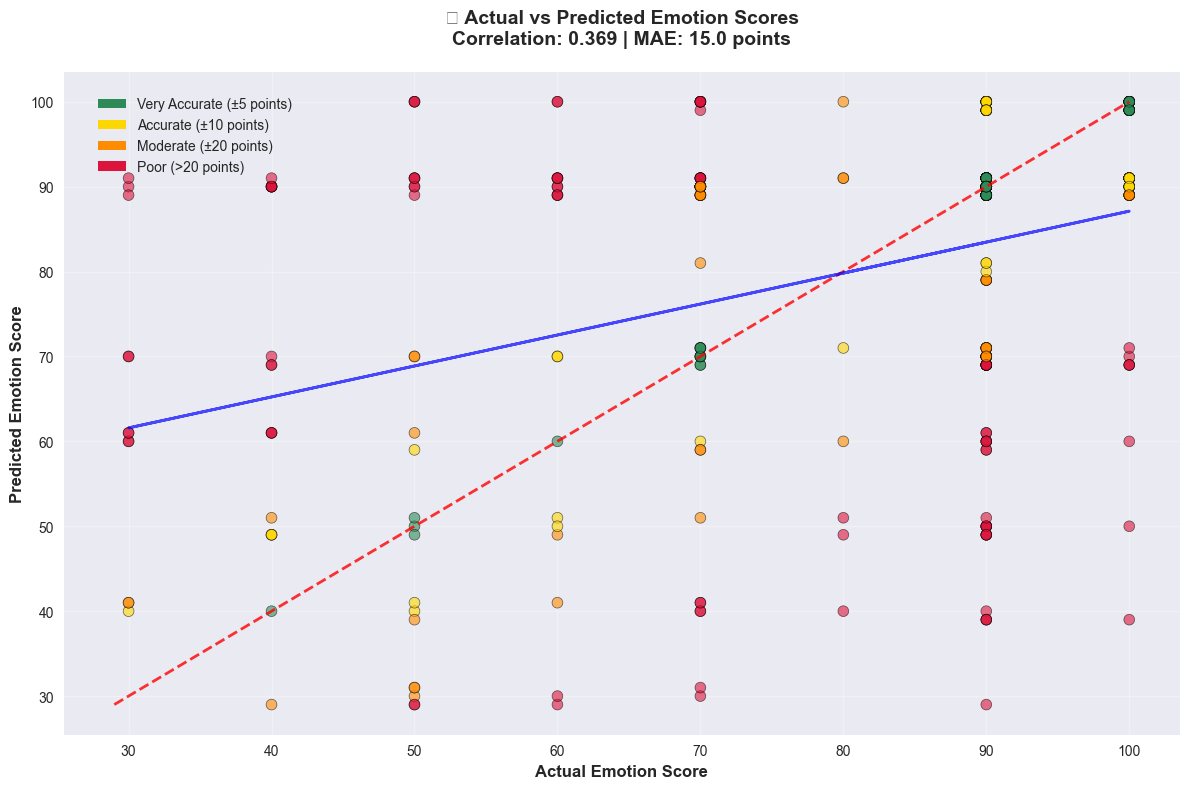

📊 The correlation of 0.369 indicates a weak relationship between actual and predicted scores.


In [14]:
# Create correlation scatter plot
plt.figure(figsize=(12, 8))

# Create scatter plot with color-coded accuracy
colors = []
for error in forecast_clean['absolute_error']:
    if error <= 5:
        colors.append('#2E8B57')  # Green for very accurate
    elif error <= 10:
        colors.append('#FFD700')  # Gold for accurate
    elif error <= 20:
        colors.append('#FF8C00')  # Orange for moderate
    else:
        colors.append('#DC143C')  # Red for poor

plt.scatter(forecast_clean['actual_score'], forecast_clean['forecast_emotion_score'], 
           c=colors, alpha=0.6, s=60, edgecolors='black', linewidth=0.5)

# Add perfect prediction line (y=x)
min_score = min(forecast_clean['actual_score'].min(), forecast_clean['forecast_emotion_score'].min())
max_score = max(forecast_clean['actual_score'].max(), forecast_clean['forecast_emotion_score'].max())
plt.plot([min_score, max_score], [min_score, max_score], 'r--', linewidth=2, label='Perfect Prediction', alpha=0.8)

# Add trend line
z = np.polyfit(forecast_clean['actual_score'], forecast_clean['forecast_emotion_score'], 1)
p = np.poly1d(z)
plt.plot(forecast_clean['actual_score'], p(forecast_clean['actual_score']), 'b-', linewidth=2, alpha=0.7, label=f'Trend Line')

plt.xlabel('Actual Emotion Score', fontsize=12, fontweight='bold')
plt.ylabel('Predicted Emotion Score', fontsize=12, fontweight='bold')
plt.title(f'🎯 Actual vs Predicted Emotion Scores\nCorrelation: {correlation:.3f} | MAE: {mae:.1f} points', 
         fontsize=14, fontweight='bold', pad=20)

# Add grid and legend
plt.grid(True, alpha=0.3)
plt.legend()

# Add color legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#2E8B57', label='Very Accurate (±5 points)'),
    Patch(facecolor='#FFD700', label='Accurate (±10 points)'),
    Patch(facecolor='#FF8C00', label='Moderate (±20 points)'),
    Patch(facecolor='#DC143C', label='Poor (>20 points)')
]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.02, 0.98))

plt.tight_layout()
plt.show()

print(f"📊 The correlation of {correlation:.3f} indicates a {'strong' if abs(correlation) > 0.7 else 'moderate' if abs(correlation) > 0.5 else 'weak'} relationship between actual and predicted scores.")

/var/folders/jb/6z7nmj212x3_86_b61z9vgkm0000gn/T/ipykernel_41994/3380417890.py:47: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/jb/6z7nmj212x3_86_b61z9vgkm0000gn/T/ipykernel_41994/3380417890.py:47: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/jb/6z7nmj212x3_86_b61z9vgkm0000gn/T/ipykernel_41994/3380417890.py:47: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/jb/6z7nmj212x3_86_b61z9vgkm0000gn/T/ipykernel_41994/3380417890.py:47: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
/Users/matthewsimon/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/matthewsimon/Library/Python/3.9/lib/python/site-packages/IPython/core/pyla

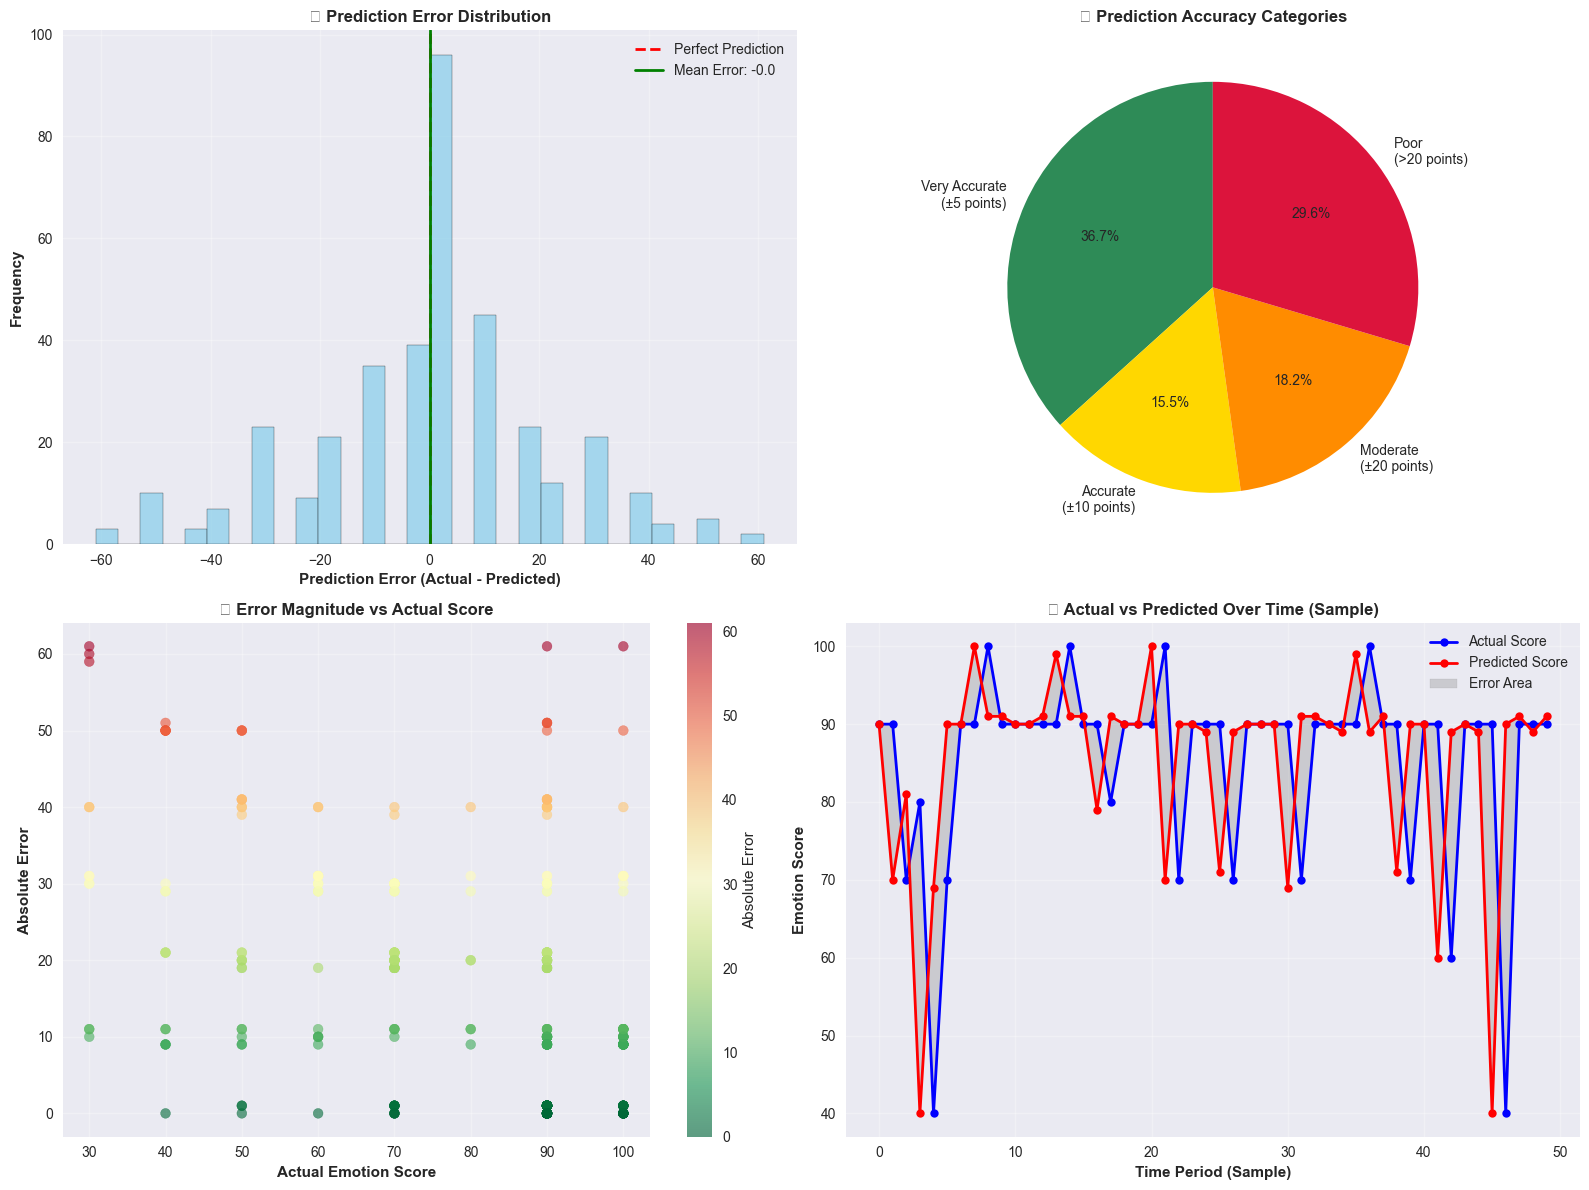


🔍 KEY INSIGHTS:
• The AI model shows a 0.369 correlation with actual scores
• Average prediction error is 15.0 points (out of 100)
• 52.2% of predictions are within ±10 points
• 36.7% of predictions are very accurate (±5 points)
• Model tends to over-predict by 0.0 points on average


In [15]:
# Create comprehensive error analysis visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Error Distribution Histogram
axes[0, 0].hist(forecast_clean['prediction_error'], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(0, color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
axes[0, 0].axvline(forecast_clean['prediction_error'].mean(), color='green', linestyle='-', linewidth=2, 
                   label=f'Mean Error: {forecast_clean["prediction_error"].mean():.1f}')
axes[0, 0].set_xlabel('Prediction Error (Actual - Predicted)', fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontweight='bold')
axes[0, 0].set_title('📊 Prediction Error Distribution', fontweight='bold', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Accuracy Categories Pie Chart
accuracy_categories = ['Very Accurate\n(±5 points)', 'Accurate\n(±10 points)', 'Moderate\n(±20 points)', 'Poor\n(>20 points)']
moderate_predictions = len(forecast_clean[(forecast_clean['absolute_error'] > 10) & (forecast_clean['absolute_error'] <= 20)])
accuracy_counts = [very_accurate, accurate_predictions - very_accurate, moderate_predictions, poor_predictions]
colors_pie = ['#2E8B57', '#FFD700', '#FF8C00', '#DC143C']

wedges, texts, autotexts = axes[0, 1].pie(accuracy_counts, labels=accuracy_categories, colors=colors_pie, 
                                          autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('🎯 Prediction Accuracy Categories', fontweight='bold', fontsize=12)

# 3. Absolute Error vs Actual Score
scatter = axes[1, 0].scatter(forecast_clean['actual_score'], forecast_clean['absolute_error'], 
                            c=forecast_clean['absolute_error'], cmap='RdYlGn_r', alpha=0.6, s=50)
axes[1, 0].set_xlabel('Actual Emotion Score', fontweight='bold')
axes[1, 0].set_ylabel('Absolute Error', fontweight='bold')
axes[1, 0].set_title('📈 Error Magnitude vs Actual Score', fontweight='bold', fontsize=12)
axes[1, 0].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[1, 0], label='Absolute Error')

# 4. Time Series of Predictions (sample)
sample_data = forecast_clean.head(50)  # Show first 50 predictions for clarity
x_pos = range(len(sample_data))
axes[1, 1].plot(x_pos, sample_data['actual_score'], 'bo-', label='Actual Score', linewidth=2, markersize=6)
axes[1, 1].plot(x_pos, sample_data['forecast_emotion_score'], 'ro-', label='Predicted Score', linewidth=2, markersize=6)
axes[1, 1].fill_between(x_pos, sample_data['actual_score'], sample_data['forecast_emotion_score'], 
                        alpha=0.3, color='gray', label='Error Area')
axes[1, 1].set_xlabel('Time Period (Sample)', fontweight='bold')
axes[1, 1].set_ylabel('Emotion Score', fontweight='bold')
axes[1, 1].set_title('📅 Actual vs Predicted Over Time (Sample)', fontweight='bold', fontsize=12)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary insights
print("\n🔍 KEY INSIGHTS:")
print(f"• The AI model shows a {correlation:.3f} correlation with actual scores")
print(f"• Average prediction error is {mae:.1f} points (out of 100)")
print(f"• {accurate_predictions/len(forecast_clean)*100:.1f}% of predictions are within ±10 points")
print(f"• {very_accurate/len(forecast_clean)*100:.1f}% of predictions are very accurate (±5 points)")
print(f"• Model tends to {'over-predict' if forecast_clean['prediction_error'].mean() < 0 else 'under-predict'} by {abs(forecast_clean['prediction_error'].mean()):.1f} points on average")

In [16]:
# Create interactive correlation analysis with Plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Create interactive scatter plot
fig = go.Figure()

# Add scatter plot with hover information
fig.add_trace(go.Scatter(
    x=forecast_clean['actual_score'],
    y=forecast_clean['forecast_emotion_score'],
    mode='markers',
    marker=dict(
        size=8,
        color=forecast_clean['absolute_error'],
        colorscale='RdYlGn_r',
        showscale=True,
        colorbar=dict(title="Absolute Error"),
        line=dict(width=1, color='black')
    ),
    text=[f"Date: {row['date']}<br>Actual: {row['actual_score']}<br>Predicted: {row['forecast_emotion_score']}<br>Error: {row['absolute_error']:.1f}<br>Confidence: {row['forecast_confidence']}%" 
          for _, row in forecast_clean.iterrows()],
    hovertemplate='<b>%{text}</b><extra></extra>',
    name='Predictions'
))

# Add perfect prediction line
min_val = min(forecast_clean['actual_score'].min(), forecast_clean['forecast_emotion_score'].min())
max_val = max(forecast_clean['actual_score'].max(), forecast_clean['forecast_emotion_score'].max())
fig.add_trace(go.Scatter(
    x=[min_val, max_val],
    y=[min_val, max_val],
    mode='lines',
    line=dict(color='red', width=3, dash='dash'),
    name='Perfect Prediction',
    hovertemplate='Perfect Prediction Line<extra></extra>'
))

# Add trend line
z = np.polyfit(forecast_clean['actual_score'], forecast_clean['forecast_emotion_score'], 1)
p = np.poly1d(z)
trend_y = p(forecast_clean['actual_score'].sort_values())
fig.add_trace(go.Scatter(
    x=forecast_clean['actual_score'].sort_values(),
    y=trend_y,
    mode='lines',
    line=dict(color='blue', width=2),
    name=f'Trend Line (r={correlation:.3f})',
    hovertemplate=f'Trend Line<br>Correlation: {correlation:.3f}<extra></extra>'
))

fig.update_layout(
    title=f'🎯 Interactive Forecast Accuracy Analysis<br><sub>Correlation: {correlation:.3f} | MAE: {mae:.1f} points | {accurate_predictions/len(forecast_clean)*100:.1f}% within ±10 points</sub>',
    xaxis_title='Actual Emotion Score',
    yaxis_title='Predicted Emotion Score',
    width=800,
    height=600,
    hovermode='closest'
)

fig.show()

print("🎮 Interactive Features:")
print("• Hover over points to see detailed information")
print("• Color intensity shows prediction error magnitude") 
print("• Red dashed line = perfect prediction")
print("• Blue line = actual trend relationship")

🎮 Interactive Features:
• Hover over points to see detailed information
• Color intensity shows prediction error magnitude
• Red dashed line = perfect prediction
• Blue line = actual trend relationship


🎯 CONFIDENCE ANALYSIS
📊 Accuracy by Score Range:
  Low Scores (30-50): 28.2 avg error, 20.0% within ±10 points (55 predictions)
  Medium Scores (51-70): 19.9 avg error, 22.2% within ±10 points (72 predictions)
  High Scores (71-90): 10.6 avg error, 67.0% within ±10 points (185 predictions)
  Excellent Scores (91-100): 10.3 avg error, 73.2% within ±10 points (56 predictions)


/var/folders/jb/6z7nmj212x3_86_b61z9vgkm0000gn/T/ipykernel_41994/1334954375.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jb/6z7nmj212x3_86_b61z9vgkm0000gn/T/ipykernel_41994/1334954375.py:68: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.

/var/folders/jb/6z7nmj212x3_86_b61z9vgkm0000gn/T/ipykernel_41994/1334954375.py:68: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.

/Users/matthewsimon/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.

/Users/matthewsimon/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing f

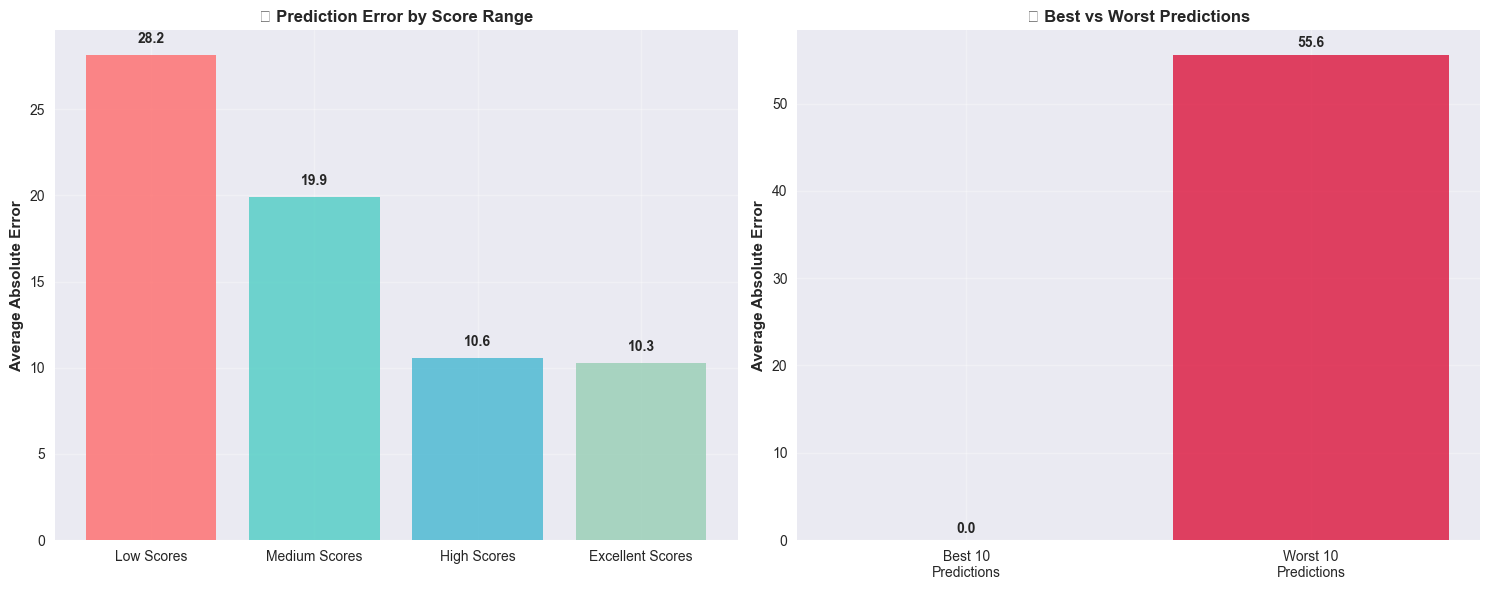


🏆 Best prediction had only 0.0 points error
❌ Worst prediction had 61.0 points error
📊 Standard deviation of errors: 15.3

🌟 EXAMPLE OF BEST PREDICTION:
Date: 16/04/2021 | Actual: 90 | Predicted: 90 | Error: 0.0

⚠️ EXAMPLE OF WORST PREDICTION:
Date: 17/09/2020 | Actual: 90 | Predicted: 29 | Error: 61.0


In [17]:
# Analyze confidence vs accuracy relationship
print("🎯 CONFIDENCE ANALYSIS")
print("=" * 50)

# Create confidence bins
forecast_clean['confidence_category'] = 'Standard Confidence (85%)'  # All predictions have 85% confidence

# Analyze accuracy by score ranges
score_ranges = [
    (30, 50, 'Low Scores (30-50)'),
    (51, 70, 'Medium Scores (51-70)'),
    (71, 90, 'High Scores (71-90)'),
    (91, 100, 'Excellent Scores (91-100)')
]

print("📊 Accuracy by Score Range:")
for min_score, max_score, label in score_ranges:
    range_data = forecast_clean[(forecast_clean['actual_score'] >= min_score) & 
                               (forecast_clean['actual_score'] <= max_score)]
    if len(range_data) > 0:
        avg_error = range_data['absolute_error'].mean()
        accuracy_within_10 = len(range_data[range_data['absolute_error'] <= 10]) / len(range_data) * 100
        print(f"  {label}: {avg_error:.1f} avg error, {accuracy_within_10:.1f}% within ±10 points ({len(range_data)} predictions)")

# Create accuracy analysis chart
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Error by Score Range
score_range_labels = []
avg_errors = []
for min_score, max_score, label in score_ranges:
    range_data = forecast_clean[(forecast_clean['actual_score'] >= min_score) & 
                               (forecast_clean['actual_score'] <= max_score)]
    if len(range_data) > 0:
        score_range_labels.append(label.split(' (')[0])
        avg_errors.append(range_data['absolute_error'].mean())

bars1 = axes[0].bar(score_range_labels, avg_errors, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'], alpha=0.8)
axes[0].set_ylabel('Average Absolute Error', fontweight='bold')
axes[0].set_title('📊 Prediction Error by Score Range', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Add value labels on bars
for bar, error in zip(bars1, avg_errors):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{error:.1f}', ha='center', va='bottom', fontweight='bold')

# 2. Best and Worst Predictions
best_predictions = forecast_clean.nsmallest(10, 'absolute_error')
worst_predictions = forecast_clean.nlargest(10, 'absolute_error')

categories = ['Best 10\nPredictions', 'Worst 10\nPredictions']
avg_errors_extreme = [best_predictions['absolute_error'].mean(), worst_predictions['absolute_error'].mean()]
colors = ['#2E8B57', '#DC143C']

bars2 = axes[1].bar(categories, avg_errors_extreme, color=colors, alpha=0.8)
axes[1].set_ylabel('Average Absolute Error', fontweight='bold')
axes[1].set_title('🎯 Best vs Worst Predictions', fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Add value labels
for bar, error in zip(bars2, avg_errors_extreme):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{error:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n🏆 Best prediction had only {best_predictions['absolute_error'].min():.1f} points error")
print(f"❌ Worst prediction had {worst_predictions['absolute_error'].max():.1f} points error")
print(f"📊 Standard deviation of errors: {forecast_clean['absolute_error'].std():.1f}")

# Show some examples of best and worst predictions
print(f"\n🌟 EXAMPLE OF BEST PREDICTION:")
best_example = forecast_clean.loc[forecast_clean['absolute_error'].idxmin()]
print(f"Date: {best_example['date']} | Actual: {best_example['actual_score']:.0f} | Predicted: {best_example['forecast_emotion_score']:.0f} | Error: {best_example['absolute_error']:.1f}")

print(f"\n⚠️ EXAMPLE OF WORST PREDICTION:")
worst_example = forecast_clean.loc[forecast_clean['absolute_error'].idxmax()]
print(f"Date: {worst_example['date']} | Actual: {worst_example['actual_score']:.0f} | Predicted: {worst_example['forecast_emotion_score']:.0f} | Error: {worst_example['absolute_error']:.1f}")